# **Exploratory Data Analysis**
---



In [2]:
import warnings
warnings.filterwarnings('ignore')

# A. Data Import & Preview

In [ ]:
# !nvidia-smi


In [ ]:
# !pip install cudf-cu11 --extra-index-url=https://pypi.nvidia.com

## 1. Importing the libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import json
import re
from collections import Counter,OrderedDict
from ipywidgets import interact, interactive, fixed, interact_manual,Layout
import ipywidgets as widgets
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# !pip install catboost
# from catboost import CatBoostClassifier

## 2. Importing Data

In [4]:
# !pip install cudf-cu11 --extra-index-url=https://pypi.nvidia.com
import cudf



In [103]:

df=pd.read_csv('/kaggle/input/ndap-education/NDAP_REPORT_7016.csv')



## 3. Viewing the data

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(y='State', data=df)
# plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('')
plt.title('Number of Schools in Each State')

In [ ]:
# Choose the column for the pie chart
pie_column = 'Status of the school building'

# Set the style for the plot
plt.style.use('seaborn')

# Get the counts for each category
category_counts = df[pie_column].value_counts()

# Identify the largest category
largest_category = category_counts.idxmax()

# Set the explode parameter to pop out the largest category
explode = [0.1 if category == largest_category else 0 for category in category_counts.index]

# Plot the pie chart without percentage values
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(category_counts, labels=None, autopct='', startangle=90, explode=explode, colors=plt.cm.Paired(range(len(category_counts))), wedgeprops=dict(width=0.3))
plt.title(f'Distribution of {pie_column}',fontsize=15)

# Add legend with category names
plt.legend(wedges, category_counts.index, title="Categories", bbox_to_anchor=(1, 0), loc="lower center",fontsize=8)

# Hide autopct valuesa
for autotext in autotexts:
    autotext.set_visible(False)

plt.show()

## 4. Shape of the dataset

In [ ]:
df.shape

## 6. Columns in the dataset

In [ ]:

df.columns

## 7. Types of data in respective columns

In [ ]:
df.dtypes

In [ ]:
#check for null values
df.isnull().sum()


In [ ]:
#check for duplicate values
df.duplicated().sum()


In [ ]:
#check for unique values
df.nunique()


In [104]:
#remove useless columns
df.drop(['Academic year','Academic year.1','Year','Country','ROWID', 'State LGD Code', 'District LGD Code'],axis=1,inplace=True)

df.head()

State         District  Unique School ID  \
0  MAHARASHTRA  MUMBAI SUBURBAN           1011885   
1  MAHARASHTRA  MUMBAI SUBURBAN           1021930   
2  MAHARASHTRA  MUMBAI SUBURBAN           1022204   
3  MAHARASHTRA  MUMBAI SUBURBAN           1023331   
4  MAHARASHTRA  MUMBAI SUBURBAN           1026618   

  Status of the school building  Building blocks in the school  \
0                  3-Government                              1   
1                  3-Government                              1   
2                  3-Government                              1   
3                  3-Government                              1   
4                  3-Government                              1   

   Pucca building blocks in the school Type of boundary wall in the school  \
0                                    1                             1-Pucca   
1                                    1                             1-Pucca   
2                                    1                             1-Pucca   
3                                    1                             1-Pucca   
4                                    1                             1-Pucca   

   Classrooms used for instructional purposes  Rooms other than classrooms  \
0                                           6                            7   
1                                           6                            9   
2                                          12                            6   
3                                           8                            6   
4                                           6                            6   

   Classrooms in good condition  ...  \
0                             6  ...   
1                             6  ...   
2                            10  ...   
3                             8  ...   
4                             6  ...   

   Students for whom furniture is available  \
0                                       123   
1                                       100   
2                                       259   
3                                       227   
4                                       130   

   Availability of ICT ( Information Communication Technology Laboratory) lab in school  \
0                                     Not Applicable                                      
1                                     Not Applicable                                      
2                                                Yes                                      
3                                     Not Applicable                                      
4                                     Not Applicable                                      

  Laptops in school  Tablets in school  Desktop computers in school  \
0                 0                  0                            2   
1                 0                 18                            2   
2                 0                229                           12   
3                 0                 28                           18   
4                 0                  0                            1   

   Digital boards with CMS in school  Projectors in school  \
0                                  1                     1   
1                                  1                     1   
2                                  1                     1   
3                                  1                     1   
4                                  1                     1   

   Printers in school  Availability of internet facility  \
0                   0                                Yes   
1                   0                                Yes   
2                   1                                Yes   
3                   1                                Yes   
4                   0                                Yes   

   Availability of DTH-TV antenna facility  
0                                      Yes  
1                                

In [ ]:
df.columns

In [ ]:
#value counts of all columns
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

In [ ]:
df.shape

In [105]:
# dropping columns with low variablity
df.drop(['Pucca building blocks in the school','Type of boundary wall in the school','Availability of separate room for Head Teacher or Principal','Functional toilet seats available for boys','Functional toilet seats available for girls', 'Friendly functional toilet seats available for boys', 'Friendly functional toilet seats available for girls',
         'Urinals available for boys', 'Urinals available for girls','Availability of functional drinking water in the school premises', 'Availability of handwashing facility with soap available for washing hands before and after meal', 'Availability of solar panel in school', 'Availability of the school has provision for rain water harvesting', 'Availablility of ramp for disabled children to access school building', 'Availability of hand-rails for ramp', 'Availability of ICT ( Information Communication Technology Laboratory) lab in school','Availability of DTH-TV antenna facility' ,'Availability of internet facility'
         , 'Rooms other than classrooms','Printers in school','Digital boards with CMS in school', 'Projectors in school'],axis=1,inplace=True)

In [106]:
# drop unique School ID, Status of the school building, Availability of medical check-up for the students conducted in last academic year, Availability of playground facility in school
df.drop(['Unique School ID','Status of the school building','Availability of medical check-up for the students conducted in last academic year','Availability of playground facility in school'],axis=1,inplace=True)
df.head()

State         District  Building blocks in the school  \
0  MAHARASHTRA  MUMBAI SUBURBAN                              1   
1  MAHARASHTRA  MUMBAI SUBURBAN                              1   
2  MAHARASHTRA  MUMBAI SUBURBAN                              1   
3  MAHARASHTRA  MUMBAI SUBURBAN                              1   
4  MAHARASHTRA  MUMBAI SUBURBAN                              1   

   Classrooms used for instructional purposes  Classrooms in good condition  \
0                                           6                             6   
1                                           6                             6   
2                                          12                            10   
3                                           8                             8   
4                                           6                             6   

   Classrooms need for minor repair  Classrooms need for major repair  \
0                                 0                                 0   
1                                 0                                 0   
2                                 2                                 0   
3                                 0                                 0   
4                                 0                                 0   

   Toilet seats available for boys  Toilet seats available for girls  \
0                                3                                 3   
1                                4                                 4   
2                                4                                 4   
3                                3                                 2   
4                                2                                 3   

  Availability of hand washing facility with soap near toilets or urinals block  \
0                                                Yes                              
1                                                Yes                              
2                                                Yes                              
3                                                Yes                              
4                                                Yes                              

  Availability of drinking water in the school premises  \
0                                                Yes      
1                                                Yes      
2                                                Yes      
3                                                Yes      
4                                                Yes      

  Availability of electricity connection in the school  \
0                                                Yes     
1                                                Yes     
2                                                Yes     
3                                                Yes     
4                                                Yes     

  Availability of library facility in school  \
0                                        Yes   
1                                        Yes   
2                                        Yes   
3                                        Yes   
4                                        Yes   

   Students for whom furniture is available  Laptops in school  \
0                                       123                  0   
1                                       100                  0   
2                                       259                  0   
3                                       227                  0   
4                                       130                  0   

   Tablets in school  Desktop computers in school  
0                  0                            2  
1                 18                            2  
2                229                           12  
3                 28                           18  
4                  0                            1

In [76]:

df.shape


(1551000, 17)

In [107]:
# convert categorical columns (Availability of hand washing facility with soap near toilets or urinals block, Availability of functional drinking water in the school premises, Availability of electricity connection in the school, Availability of library facility in school) to numerical columns
df['Availability of hand washing facility with soap near toilets or urinals block'] = df['Availability of hand washing facility with soap near toilets or urinals block'].map({'Yes': 1, 'No': 0})
df['Availability of drinking water in the school premises'] = df['Availability of drinking water in the school premises'].map({'Yes': 1, 'No': 0})
df['Availability of electricity connection in the school'] = df['Availability of electricity connection in the school'].map({'Yes': 1, 'No': 0})
df['Availability of library facility in school'] = df['Availability of library facility in school'].map({'Yes': 1, 'No': 0})
df.head()



State         District  Building blocks in the school  \
0  MAHARASHTRA  MUMBAI SUBURBAN                              1   
1  MAHARASHTRA  MUMBAI SUBURBAN                              1   
2  MAHARASHTRA  MUMBAI SUBURBAN                              1   
3  MAHARASHTRA  MUMBAI SUBURBAN                              1   
4  MAHARASHTRA  MUMBAI SUBURBAN                              1   

   Classrooms used for instructional purposes  Classrooms in good condition  \
0                                           6                             6   
1                                           6                             6   
2                                          12                            10   
3                                           8                             8   
4                                           6                             6   

   Classrooms need for minor repair  Classrooms need for major repair  \
0                                 0                                 0   
1                                 0                                 0   
2                                 2                                 0   
3                                 0                                 0   
4                                 0                                 0   

   Toilet seats available for boys  Toilet seats available for girls  \
0                                3                                 3   
1                                4                                 4   
2                                4                                 4   
3                                3                                 2   
4                                2                                 3   

   Availability of hand washing facility with soap near toilets or urinals block  \
0                                                  1                               
1                                                  1                               
2                                                  1                               
3                                                  1                               
4                                                  1                               

   Availability of drinking water in the school premises  \
0                                                  1       
1                                                  1       
2                                                  1       
3                                                  1       
4                                                  1       

   Availability of electricity connection in the school  \
0                                                1.0      
1                                                1.0      
2                                                1.0      
3                                                1.0      
4                                                1.0      

   Availability of library facility in school  \
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   Students for whom furniture is available  Laptops in school  \
0                                       123                  0   
1                                       100                  0   
2                                       259                  0   
3                                       227                  0   
4                                       130                  0   

   Tablets in school  Desktop computers in school  
0                  0                            2  
1                 18                            2  
2                229                           12  
3                 28                           18  
4                  0                            1

In [108]:
computer_columns = ['Laptops in school', 'Tablets in school', 'Desktop computers in school']

# Create a new 'Computers' column as the sum of the specified columns
df['Computers'] = df[computer_columns].sum(axis=1)
df.drop(['Laptops in school', 'Tablets in school', 'Desktop computers in school'],axis=1,inplace=True)
df.head()

State         District  Building blocks in the school  \
0  MAHARASHTRA  MUMBAI SUBURBAN                              1   
1  MAHARASHTRA  MUMBAI SUBURBAN                              1   
2  MAHARASHTRA  MUMBAI SUBURBAN                              1   
3  MAHARASHTRA  MUMBAI SUBURBAN                              1   
4  MAHARASHTRA  MUMBAI SUBURBAN                              1   

   Classrooms used for instructional purposes  Classrooms in good condition  \
0                                           6                             6   
1                                           6                             6   
2                                          12                            10   
3                                           8                             8   
4                                           6                             6   

   Classrooms need for minor repair  Classrooms need for major repair  \
0                                 0                                 0   
1                                 0                                 0   
2                                 2                                 0   
3                                 0                                 0   
4                                 0                                 0   

   Toilet seats available for boys  Toilet seats available for girls  \
0                                3                                 3   
1                                4                                 4   
2                                4                                 4   
3                                3                                 2   
4                                2                                 3   

   Availability of hand washing facility with soap near toilets or urinals block  \
0                                                  1                               
1                                                  1                               
2                                                  1                               
3                                                  1                               
4                                                  1                               

   Availability of drinking water in the school premises  \
0                                                  1       
1                                                  1       
2                                                  1       
3                                                  1       
4                                                  1       

   Availability of electricity connection in the school  \
0                                                1.0      
1                                                1.0      
2                                                1.0      
3                                                1.0      
4                                                1.0      

   Availability of library facility in school  \
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   Students for whom furniture is available  Computers  
0                                       123          2  
1                                       100         20  
2                                       259        241  
3                                       227         46  
4                                       130          1

In [86]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Building blocks in the school',
       'Classrooms used for instructional purposes',
       'Classrooms in good condition', 'Classrooms need for minor repair',
       'Classrooms need for major repair', 'Toilet seats available for boys',
       'Toilet seats available for girls',
       'Availability of hand washing facility with soap near toilets or urinals block',
       'Availability of drinking water in the school premises',
       'Availability of electricity connection in the school',
       'Availability of library facility in school',
       'Students for whom furniture is available', 'Computers'],
      dtype='object')

In [80]:
df.shape

(1551000, 15)

In [109]:
df.isnull().sum()

State                                                                                0
District                                                                             0
Building blocks in the school                                                        0
Classrooms used for instructional purposes                                           0
Classrooms in good condition                                                         0
Classrooms need for minor repair                                                     0
Classrooms need for major repair                                                     0
Toilet seats available for boys                                                      0
Toilet seats available for girls                                                     0
Availability of hand washing facility with soap near toilets or urinals block        0
Availability of drinking water in the school premises                                0
Availability of electricity connection in t

In [110]:
# Specify the column with NaN values
column_with_nan = 'Availability of electricity connection in the school'

# Remove rows with NaN values in the specified column
df = df.dropna(subset=[column_with_nan])

# Check if NaN values are removed
print(df.isnull().sum())

State                                                                            0
District                                                                         0
Building blocks in the school                                                    0
Classrooms used for instructional purposes                                       0
Classrooms in good condition                                                     0
Classrooms need for minor repair                                                 0
Classrooms need for major repair                                                 0
Toilet seats available for boys                                                  0
Toilet seats available for girls                                                 0
Availability of hand washing facility with soap near toilets or urinals block    0
Availability of drinking water in the school premises                            0
Availability of electricity connection in the school                             0
Avai

In [111]:
df.shape

(1506350, 15)

In [112]:
def calculate_outlier_percentage(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    percentage_outliers = (len(outliers) / len(df)) * 100
    return percentage_outliers

# Calculate the percentage of outliers for each numerical column
outlier_percentages = {column: calculate_outlier_percentage(column) for column in numerical_columns}

# Create a DataFrame to display the results
outlier_percentage_df = pd.DataFrame(list(outlier_percentages.items()), columns=['Column', 'Percentage of Outliers'])
outlier_percentage_df.sort_values(by='Percentage of Outliers', ascending=False, inplace=True)

# Display the results
print(outlier_percentage_df)

                                               Column  Percentage of Outliers
9   Availability of electricity connection in the ...               23.953995
3                    Classrooms need for minor repair               21.160222
4                    Classrooms need for major repair               18.211770
12                                          Computers               13.528396
0                       Building blocks in the school               11.909184
11           Students for whom furniture is available               11.608989
6                    Toilet seats available for girls                8.581538
5                     Toilet seats available for boys                7.847446
2                        Classrooms in good condition                5.814784
1          Classrooms used for instructional purposes                5.612242
8   Availability of drinking water in the school p...                4.265742
7   Availability of hand washing facility with soa...           

In [69]:
df.shape

(1287354, 15)

In [114]:
df_numeric = df.select_dtypes(include='number')
df_numeric

Building blocks in the school  \
0                                    1   
1                                    1   
2                                    1   
3                                    1   
4                                    1   
...                                ...   
1550994                              1   
1550996                              3   
1550997                              5   
1550998                              1   
1550999                              1   

         Classrooms used for instructional purposes  \
0                                                 6   
1                                                 6   
2                                                12   
3                                                 8   
4                                                 6   
...                                             ...   
1550994                                           3   
1550996                                           5   
1550997                                           5   
1550998                                           3   
1550999                                           2   

         Classrooms in good condition  Classrooms need for minor repair  \
0                                   6                                 0   
1                                   6                                 0   
2                                  10                                 2   
3                                   8                                 0   
4                                   6                                 0   
...                               ...                               ...   
1550994                             3                                 0   
1550996                             3                                 1   
1550997                             5                                 0   
1550998                             3                                 0   
1550999                             2                                 0   

         Classrooms need for major repair  Toilet seats available for boys  \
0                                       0                                3   
1                                       0                                4   
2                                       0                                4   
3                                       0                                3   
4                                       0                                2   
...                                   ...                              ...   
1550994                                 0                                1   
1550996                                 1                                2   
1550997                                 0                                1   
1550998                                 0                                1   
1550999                                 0                                1   

         Toilet seats available for girls  \
0                                       3   
1                                       4   
2                                       4   
3                                       2   
4                                       3   
...                                   ...   
1550994                                 1   
1550996                                 0   
1550997                                 1   
1550998                                 1   
1550999                                 1   

         Availability of hand washing facility with soap near toilets or urinals block  \
0                                                        1                               
1                                                        1                               
2                                                        1                               
3                                                        1                               
4             

In [115]:
# Define a function to replace outliers with the 95th percentile value for numerical columns
def replace_outliers_with_percentile(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the 95th percentile value
    series[ (series > upper_bound)] = series.quantile(0.99)

    return series



# Replace outliers in categorical columns (if needed, based on your criteria)
# You might want to define a different logic for handling outliers in categorical columns

# Combine the modified numerical columns with the original categorical columns
df_combined = pd.concat([df_numeric, df.select_dtypes(exclude='number')], axis=1)

In [118]:
df_combined

Building blocks in the school  \
0                                    1   
1                                    1   
2                                    1   
3                                    1   
4                                    1   
...                                ...   
1550994                              1   
1550996                              3   
1550997                              5   
1550998                              1   
1550999                              1   

         Classrooms used for instructional purposes  \
0                                                 6   
1                                                 6   
2                                                12   
3                                                 8   
4                                                 6   
...                                             ...   
1550994                                           3   
1550996                                           5   
1550997                                           5   
1550998                                           3   
1550999                                           2   

         Classrooms in good condition  Classrooms need for minor repair  \
0                                   6                                 0   
1                                   6                                 0   
2                                  10                                 2   
3                                   8                                 0   
4                                   6                                 0   
...                               ...                               ...   
1550994                             3                                 0   
1550996                             3                                 1   
1550997                             5                                 0   
1550998                             3                                 0   
1550999                             2                                 0   

         Classrooms need for major repair  Toilet seats available for boys  \
0                                       0                                3   
1                                       0                                4   
2                                       0                                4   
3                                       0                                3   
4                                       0                                2   
...                                   ...                              ...   
1550994                                 0                                1   
1550996                                 1                                2   
1550997                                 0                                1   
1550998                                 0                                1   
1550999                                 0                                1   

         Toilet seats available for girls  \
0                                       3   
1                                       4   
2                                       4   
3                                       2   
4                                       3   
...                                   ...   
1550994                                 1   
1550996                                 0   
1550997                                 1   
1550998                                 1   
1550999                                 1   

         Availability of hand washing facility with soap near toilets or urinals block  \
0                                                        1                               
1                                                        1                               
2                                                        1                               
3                                                        1                               
4             

In [93]:
df.shape

(899304, 15)

In [96]:
df.isnull().sum()

State                                                                            0
District                                                                         0
Building blocks in the school                                                    0
Classrooms used for instructional purposes                                       0
Classrooms in good condition                                                     0
Classrooms need for minor repair                                                 0
Classrooms need for major repair                                                 0
Toilet seats available for boys                                                  0
Toilet seats available for girls                                                 0
Availability of hand washing facility with soap near toilets or urinals block    0
Availability of drinking water in the school premises                            0
Availability of electricity connection in the school                             0
Avai

In [95]:
# import pandas as pd
# from scipy.stats import zscore

# # Assuming your DataFrame is named df

# # Specify the columns with outliers and their corresponding z-scores
# columns_with_outliers = ['Building_blocks_in_the_school',
#        'Classrooms_used_for_instructional_purposes',
#        'Classrooms_in_good_condition', 'Classrooms_need_for_minor_repair',
#        'Classrooms_need_for_major_repair', 'Toilet_seats_available_for_boys',
#        'Toilet_seats_available_for_girls',
#        'Availability_of_hand_washing_facility_with_soap_near_toilets_or_urinals_block',
#        'Availability_of_drinking_water_in_the_school_premises',
#        'Availability_of_electricity_connection_in_the_school',
#        'Availability_of_library_facility_in_school',
#        'Students_for_whom_furniture_is_available', 'Computers']

# # Calculate z-scores for specified columns
# z_scores = abs(zscore(df[columns_with_outliers]))

# # Set a threshold for z-score (e.g., 3, you can adjust based on your preference)
# threshold = 2.5

# # Create a boolean mask for outliers
# outliers_mask = (z_scores > threshold).any(axis=1)

# # Remove rows with outliers
# df_no_outliers = df[~outliers_mask]


In [94]:
# df_no_outliers.shape

# district wise


# State wise



In [98]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns, categorical_columns

(Index(['Building blocks in the school',
        'Classrooms used for instructional purposes',
        'Classrooms in good condition', 'Classrooms need for minor repair',
        'Classrooms need for major repair', 'Toilet seats available for boys',
        'Toilet seats available for girls',
        'Availability of hand washing facility with soap near toilets or urinals block',
        'Availability of drinking water in the school premises',
        'Availability of electricity connection in the school',
        'Availability of library facility in school',
        'Students for whom furniture is available', 'Computers'],
       dtype='object'),
 Index(['State', 'District'], dtype='object'))

In [101]:
df

State         District  Building blocks in the school  \
8           MAHARASHTRA  MUMBAI SUBURBAN                       1.000000   
11          MAHARASHTRA  MUMBAI SUBURBAN                       1.000000   
13          MAHARASHTRA  MUMBAI SUBURBAN                       1.000000   
15          MAHARASHTRA  MUMBAI SUBURBAN                       1.000000   
29          MAHARASHTRA  MUMBAI SUBURBAN                       1.000000   
...                 ...              ...                            ...   
1550993           BIHAR      MUZAFFARPUR                       1.000000   
1550994  MADHYA PRADESH       CHHATARPUR                       1.000000   
1550997   UTTAR PRADESH        BARABANKI                       1.698306   
1550998          PUNJAB          PATIALA                       1.000000   
1550999       KARNATAKA   UTTARA KANNADA                       1.000000   

         Classrooms used for instructional purposes  \
8                                                 5   
11                                                2   
13                                                6   
15                                                6   
29                                                4   
...                                             ...   
1550993                                           5   
1550994                                           3   
1550997                                           5   
1550998                                           3   
1550999                                           2   

         Classrooms in good condition  Classrooms need for minor repair  \
8                                   5                               0.0   
11                                  2                               0.0   
13                                  6                               0.0   
15                                  6                               0.0   
29                                  4                               0.0   
...                               ...                               ...   
1550993                             5                               0.0   
1550994                             3                               0.0   
1550997                             5                               0.0   
1550998                             3                               0.0   
1550999                             2                               0.0   

         Classrooms need for major repair  Toilet seats available for boys  \
8                                     0.0                              1.0   
11                                    0.0                              1.0   
13                                    0.0                              1.0   
15                                    0.0                              1.0   
29                                    0.0                              1.0   
...                                   ...                              ...   
1550993                               0.0                              1.0   
1550994                               0.0                              1.0   
1550997                               0.0                              1.0   
1550998                               0.0                              1.0   
1550999                               0.0                              1.0   

         Toilet seats available for girls  \
8                                       1   
11                                      1   
13                                      1   
15                                      1   
29                                      1   
...                                   ...   
1550993                                 1   
1550994                                 1   
1550997                                 1   
1550998                                 1   
1550999                                 1   

         Availability of hand washing facility with soap near toilets or urin

In [119]:
# Group the data by district
grouped_df = df.drop(columns = 'State').groupby('District')

# Calculate the mean of each column per district
mean_df = grouped_df.mean()
mean_df

Building blocks in the school  \
District                                            
24 PARAGANAS NORTH                       1.238185   
24 PARAGANAS SOUTH                       1.596908   
ADILABAD                                 1.942797   
AGAR MALWA                               2.064415   
AGRA                                     1.496177   
...                                           ...   
YADGIR                                   2.384326   
YAMUNANAGAR                              1.302801   
YANAM                                    1.729730   
YAVATMAL                                 2.272358   
ZUNHEBOTO                                5.235714   

                    Classrooms used for instructional purposes  \
District                                                         
24 PARAGANAS NORTH                                    6.255063   
24 PARAGANAS SOUTH                                    6.719325   
ADILABAD                                              4.253531   
AGAR MALWA                                            4.565593   
AGRA                                                  6.356078   
...                                                        ...   
YADGIR                                                5.460188   
YAMUNANAGAR                                           7.913702   
YANAM                                                11.486486   
YAVATMAL                                              5.816057   
ZUNHEBOTO                                             7.721429   

                    Classrooms in good condition  \
District                                           
24 PARAGANAS NORTH                      4.810019   
24 PARAGANAS SOUTH                      4.832045   
ADILABAD                                3.617232   
AGAR MALWA                              4.074627   
AGRA                                    5.642775   
...                                          ...   
YADGIR                                  4.730408   
YAMUNANAGAR                             7.158970   
YANAM                                  11.486486   
YAVATMAL                                5.156843   
ZUNHEBOTO                               6.464286   

                    Classrooms need for minor repair  \
District                                               
24 PARAGANAS NORTH                          0.660951   
24 PARAGANAS SOUTH                          0.898243   
ADILABAD                                    0.399011   
AGAR MALWA                                  0.303221   
AGRA                                        0.452408   
...                                              ...   
YADGIR                                      0.241379   
YAMUNANAGAR                                 0.406510   
YANAM                                       0.000000   
YAVATMAL                                    0.381098   
ZUNHEBOTO                                   1.000000   

                    Classrooms need for major repair  \
District                                               
24 PARAGANAS NORTH                          0.802592   
24 PARAGANAS SOUTH                          0.989599   
ADILABAD                                    0.237288   
AGAR MALWA                                  0.187745   
AGRA                                        0.260894   
...                                              ...   
YADGIR                                      0.488401   
YAMUNANAGAR                                 0.348221   
YANAM                                       0.000000   
YAVATMAL                                    0.278117   
ZUNHEBOTO                                   0.257143   

                    Toilet seats available for boys  \
District                                              
24 PARAGANAS NORTH                         1.552120   
24 PARAGANAS SOUTH                         1.392410   
ADILABAD                                   1.581215   
AGAR MALWA                                 1.237235   
AGRA  

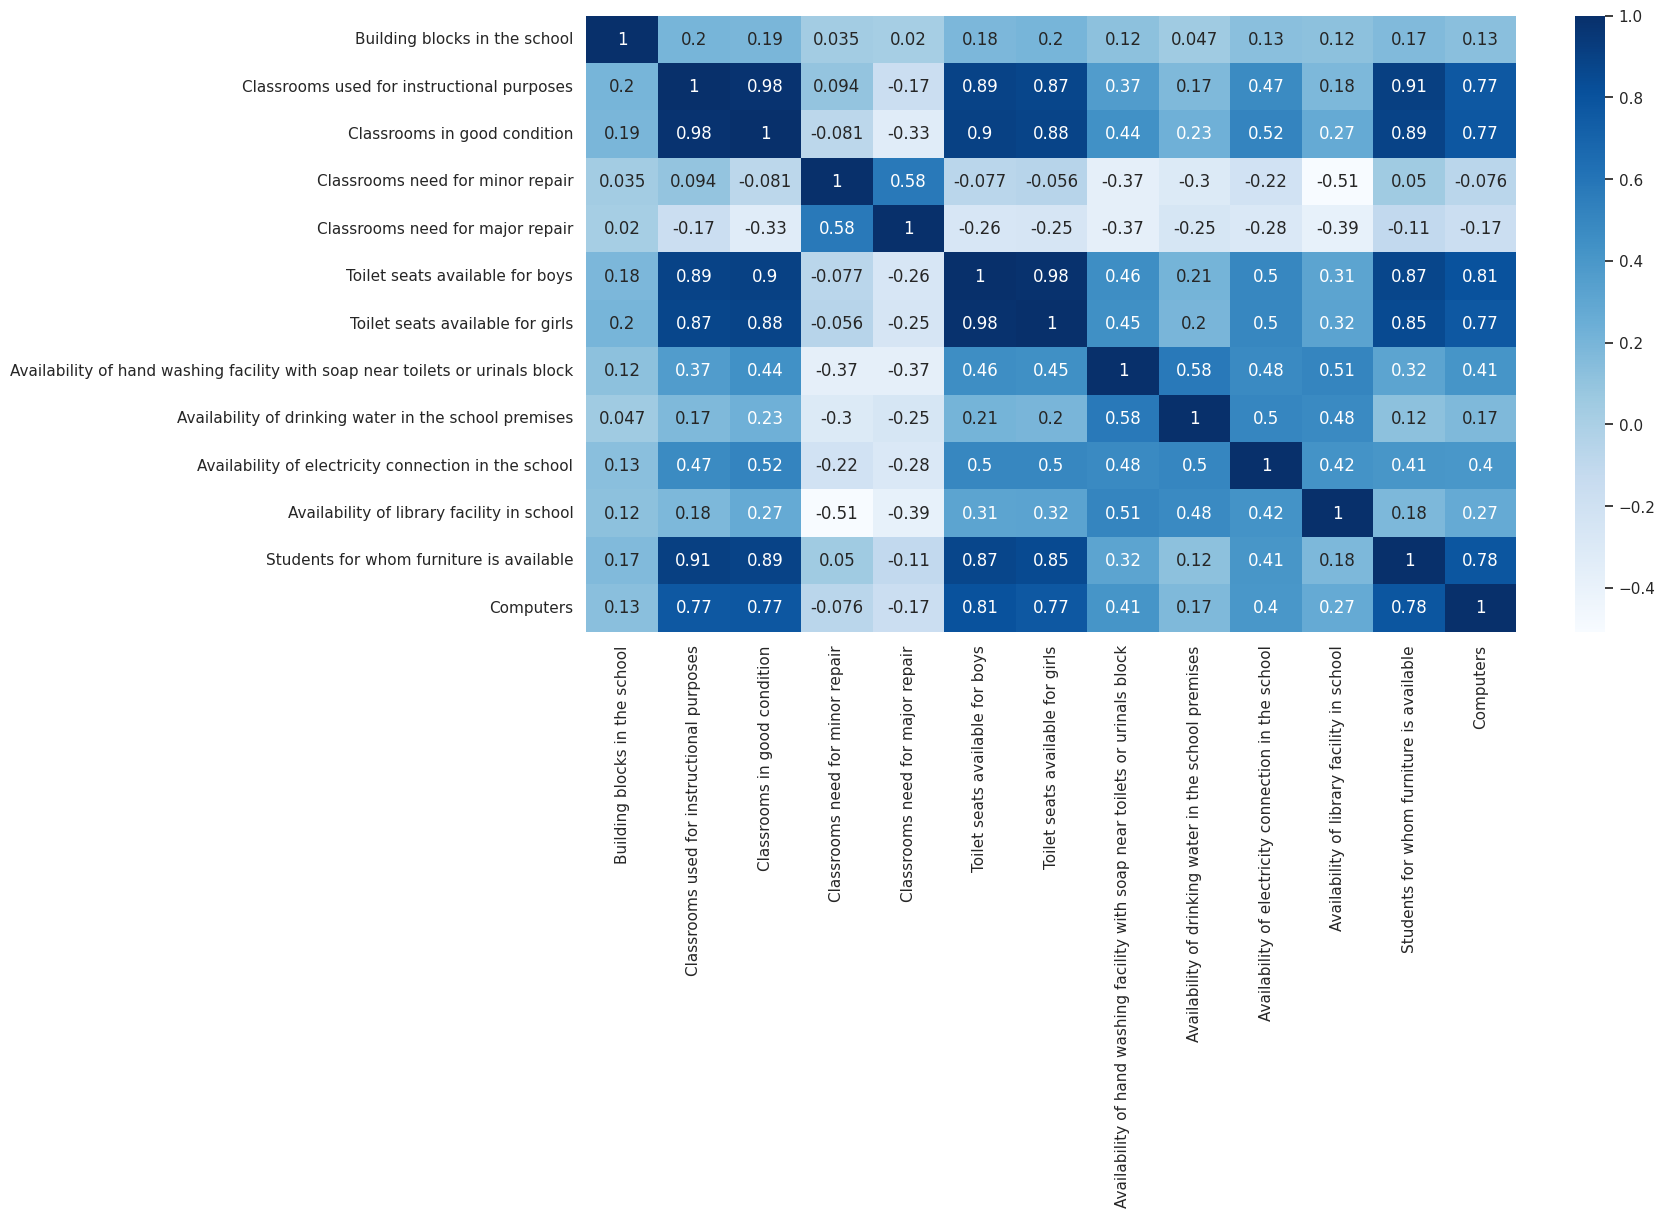

In [120]:
#corr matrix
corr = mean_df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()


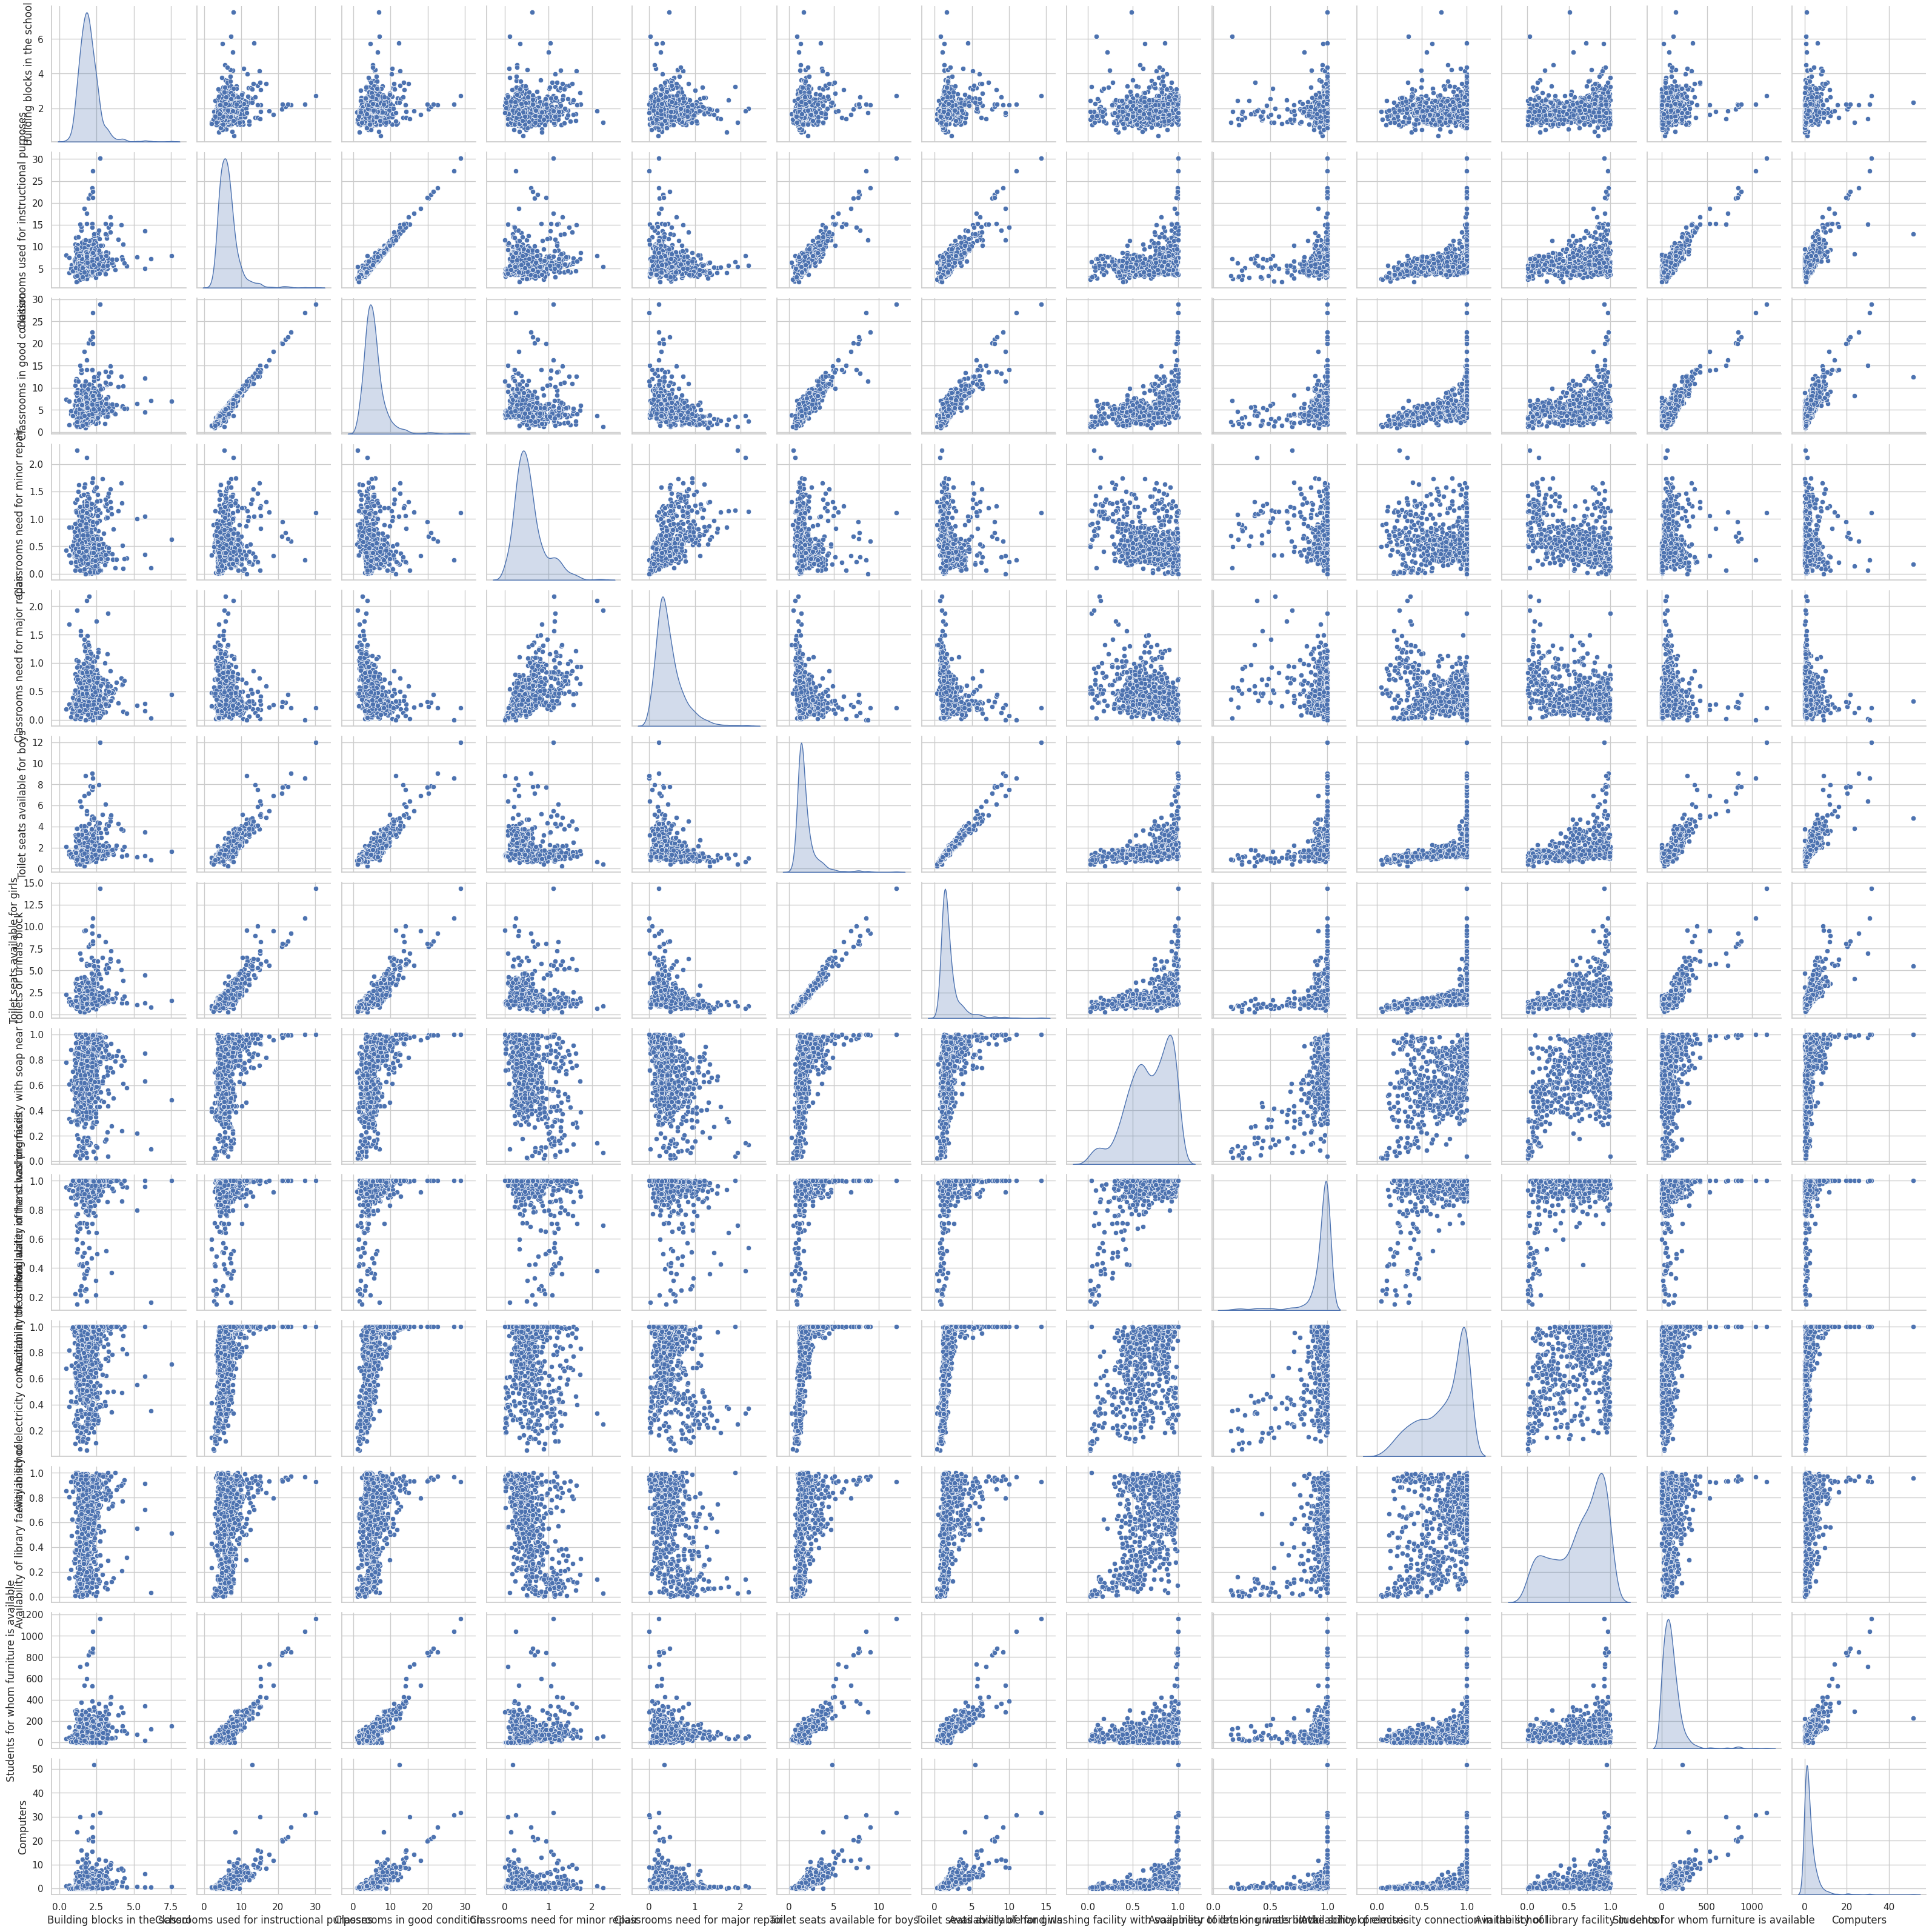

In [121]:
sns.pairplot(mean_df, diag_kind='kde')
plt.show()

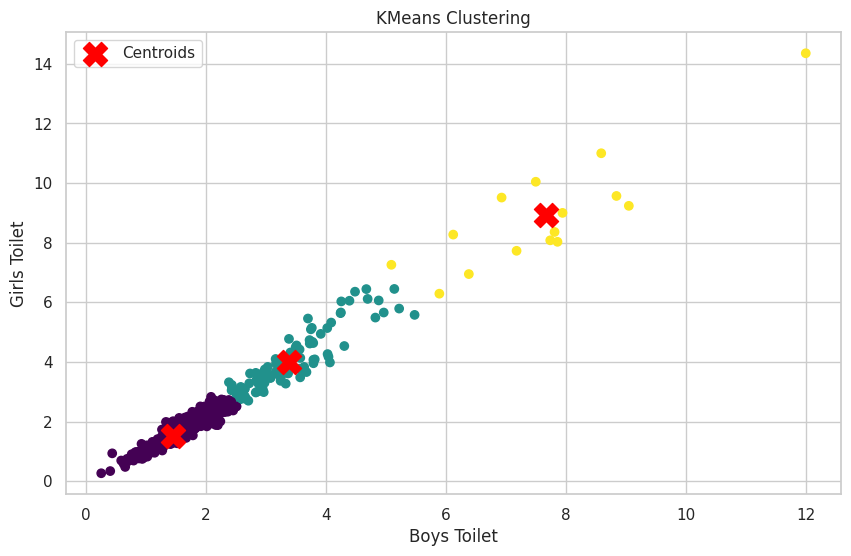

In [168]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Standardize the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(mean_df)

# Choose two columns for the new dataset
selected_columns = ['Toilet seats available for boys', 'Toilet seats available for girls']

# Create a new dataset with only the selected columns
data = mean_df[selected_columns]

# Display the new dataset
# print(new_dataset.head())
# Choose two columns for KMeans clustering
feature1 = 'Toilet seats available for boys'
feature2 = 'Toilet seats available for girls'

# Concatenate selected features
features = pd.concat([data[feature1], data[feature2]], axis=1)

# Determine the number of clusters (you may need to choose this based on your data)
n_clusters = 3

# Fit KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features)

# Add cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(data[feature1], data[feature2], c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title(f'KMeans Clustering')
plt.xlabel('Boys Toilet')
plt.ylabel('Girls Toilet')
plt.legend()
plt.show()

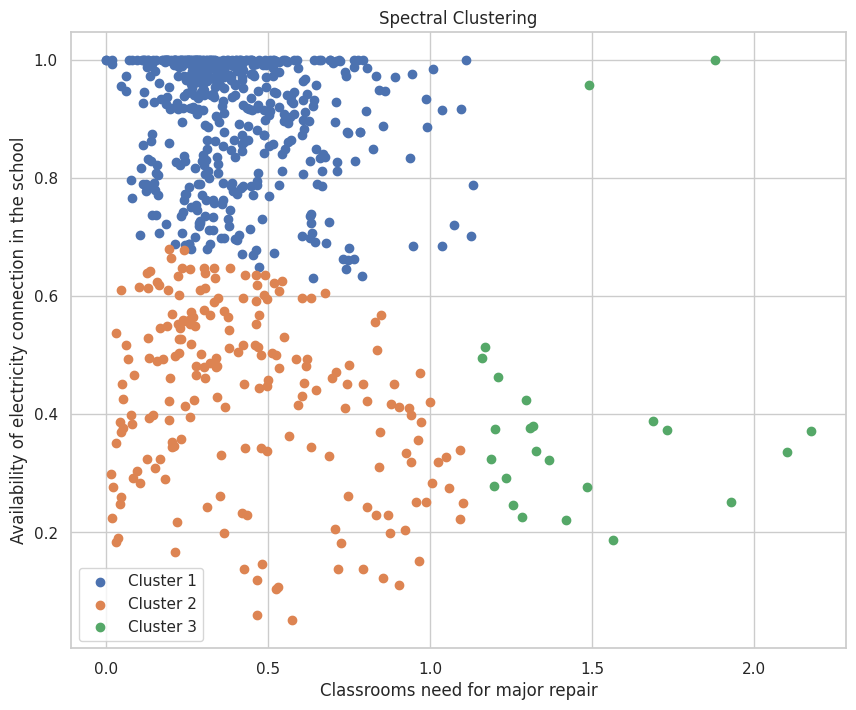

In [172]:
from sklearn.cluster import SpectralClustering
# 'Classrooms need for major repair'
feature1 = 'Classrooms need for major repair'
feature2 = 'Availability of electricity connection in the school'

features = [feature1, feature2]  # Replace with your actual column names
data = mean_df[features]


# Specify spectral clustering parameters
n_clusters = 3 # Number of clusters
n_neighbors = 15  # Number of nearest neighbors for the affinity matrix
gamma = 1.0  # Scaling factor for the affinity matrix

# Spectral clustering
spectral = SpectralClustering(n_clusters=n_clusters, n_neighbors=n_neighbors, gamma=gamma)
mean_df['cluster'] = spectral.fit_predict(data)

# Plot the clusters
plt.figure(figsize=(10, 8))
unique_clusters = mean_df['cluster'].unique()
for cluster in unique_clusters:
    cluster_data = mean_df[mean_df['cluster'] == cluster]
    plt.scatter(cluster_data[features[0]], cluster_data[features[1]], label=f'Cluster {cluster + 1}')

plt.title('Spectral Clustering')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your original dataset is named 'original_df'
# Replace 'original_df' with the actual name of your dataset

# Drop columns 'Cluster', 'agg_cluster', 'k_label' from the original dataset
# columns_to_remove = ['Cluster', 'agg_cluster', 'k_label']
# processed_df = mean_df.drop(columns=columns_to_remove)

# # Separate the State column (if needed)
# state_column = mean_df['District']
# processed_df = mean_df.drop(columns=['District'])

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(mean_df)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, len(mean_df.columns) + 1)])

# # If you removed the 'State' column, you can add it back
# pca_df['District'] = state_column.values

# Display the new DataFrame with PCA results
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.351527 -0.409984  0.396059 -1.389528  0.895562  1.118909 -0.140591   
1   -1.091514  1.210969  0.762985 -1.166183  0.219896  1.361982 -0.074554   
2   -1.056708 -0.349093 -0.843326  0.967283 -0.376685  1.846686 -0.060210   
3   -1.436967 -1.091329 -0.811186  1.333311  0.513822  0.609195 -0.643768   
4   -0.675301  0.347253 -1.183615 -0.110679 -0.851590 -0.535582  0.384874   
..        ...       ...       ...       ...       ...       ...       ...   
709 -0.478362 -0.449409  0.242113  0.619045 -0.149741  0.781106  0.448496   
710  1.656820 -0.943176 -0.448502 -0.975320  0.053500  0.317117  0.046177   
711  7.681113  0.019191 -1.925471  0.417356  0.641516  0.106370 -0.088560   
712  0.671264 -1.305411  0.455674  0.173918 -0.179613  0.041586  0.303805   
713 -0.944193  1.761029  2.363934  4.250701 -1.292758  0.189293 -1.245473   

          PC8       PC9      PC10      PC11      PC12      PC13  
0    0.545785 -0.412616 -0.416021  0.055530  0.044137  0.003965  
1   -0.159654 -0.266442 -0.252664  0.195596  0.009993 -0.000244  
2    0.323626  0.138762  0.293930 -0.405853  0.004811  0.000406  
3    0.287860  0.041929 -0.073794  0.230841  0.048506 -0.000070  
4   -0.391551 -0.131890 -0.218557 -0.323387 -0.054369 -0.000394  
..        ...       ...       ...       ...       ...       ...  
709 -1.008516  0.026723 -0.115880 -0.318179 -0.109753  0.000055  
710  0.449922 -0.456860 -0.027539  0.045815  0.100288 -0.000397  
711  0.393599 -1.797551  3.827072  0.508805  0.826842 -0.000032  
712  0.314614  0.037320 -0.168568 -0.563606  0.021651  0.000002  
713 -0.454867  0.792004 -0.535033  0.232273  0.066248  0.000549  

[714 rows x 13 columns]

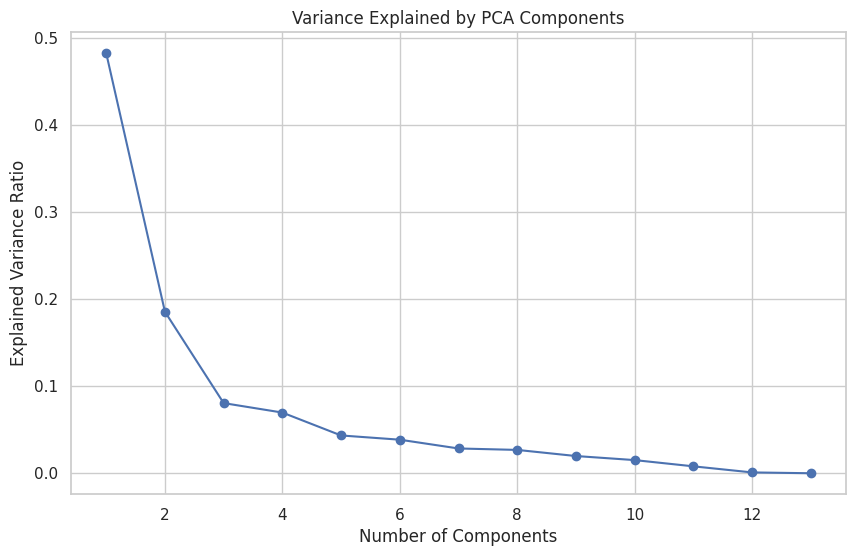

In [123]:
import matplotlib.pyplot as plt

# Get the explained variance ratio from the PCA
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the variance explained by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

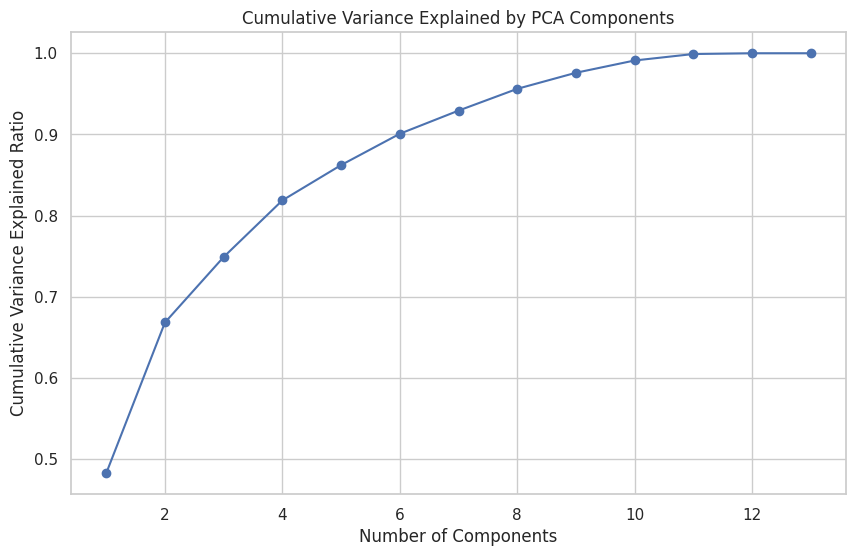

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X is your data (without the columns Cluster, agg_cluster, k_label)
# X = ...

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Get the cumulative percentage of variance explained
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative percentage of variance explained by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained Ratio')
plt.grid(True)
plt.show()

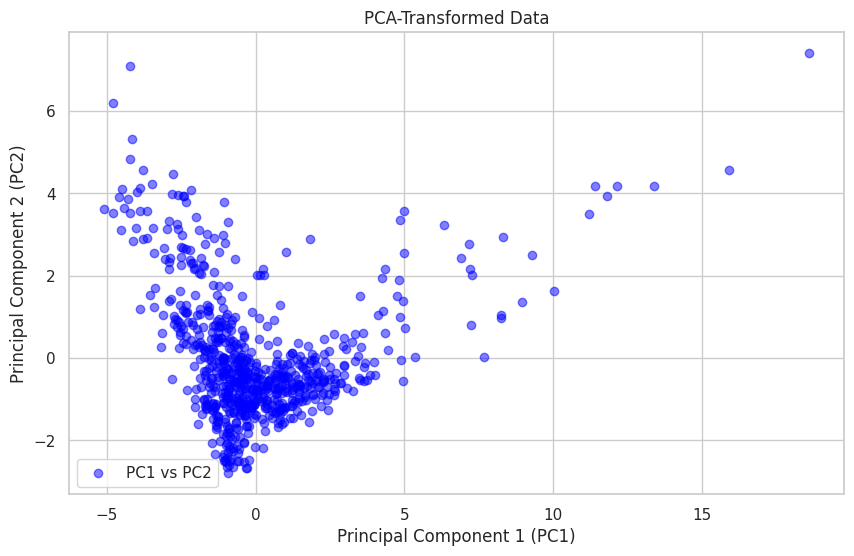

In [128]:
num_components = 3  # Replace with your chosen number of components

# Apply PCA and transform the data
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA-transformed data
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, num_components + 1)])

# Plot the PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', alpha=0.5, label='PC1 vs PC2')
plt.title('PCA-Transformed Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

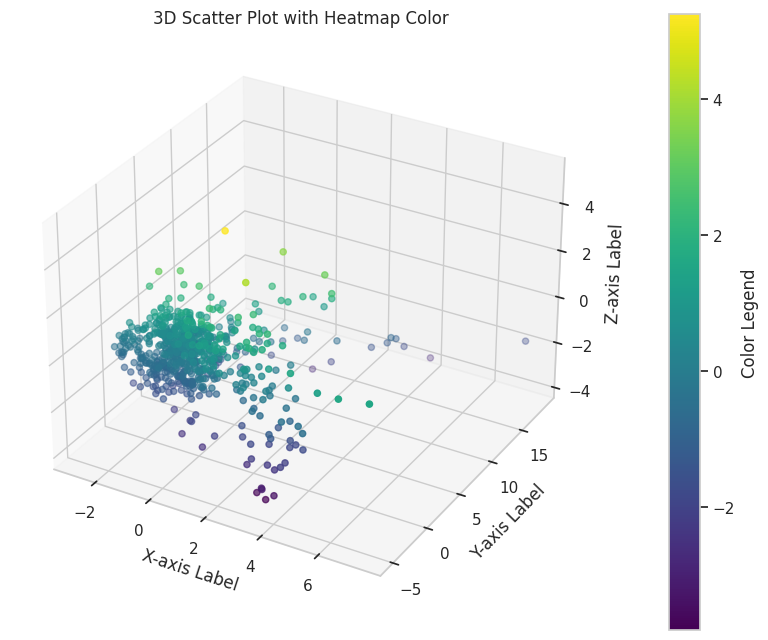

In [131]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Replace 'column1', 'column2', and 'column3' with the actual column names from your DataFrame
x = pca_df['PC2']
y = pca_df['PC1']
z = pca_df['PC3']

# Choose a column for color mapping, replace 'color_column' with the desired column name
color_column = pca_df['PC3']

# Create a 3D scatter plot with heatmap-like color
sc = ax.scatter(x, y, z, c=color_column, cmap='viridis', marker='o')

# Set labels for each axis
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.set_zlabel('Z-axis Label')

# Set the title of the plot
ax.set_title('3D Scatter Plot with Heatmap Color')

# Create a colorbar
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Color Legend')

# Show the plot
plt.show()

                  State         District  Building blocks in the school  \
0           MAHARASHTRA  MUMBAI SUBURBAN                              1   
1           MAHARASHTRA  MUMBAI SUBURBAN                              1   
2           MAHARASHTRA  MUMBAI SUBURBAN                              1   
3           MAHARASHTRA  MUMBAI SUBURBAN                              1   
4           MAHARASHTRA  MUMBAI SUBURBAN                              1   
...                 ...              ...                            ...   
1550994  MADHYA PRADESH       CHHATARPUR                              1   
1550996         TRIPURA    North Tripura                              3   
1550997   UTTAR PRADESH        BARABANKI                              5   
1550998          PUNJAB          PATIALA                              1   
1550999       KARNATAKA   UTTARA KANNADA                              1   

         Classrooms used for instructional purposes  \
0                                           

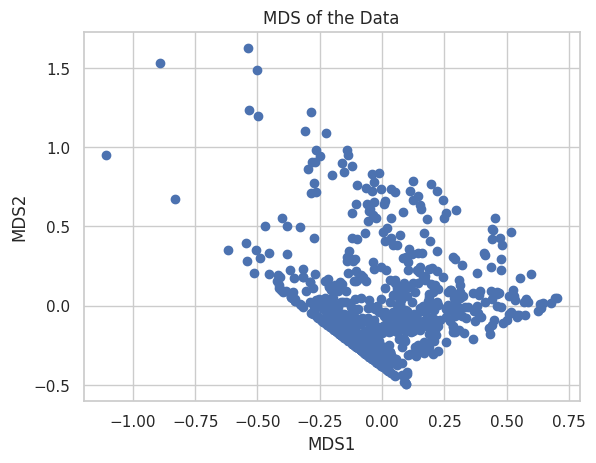

In [126]:
from sklearn.manifold import MDS
# Instantiate MDS
mds = MDS(n_components=2)

# Fit and transform the data
# Choose two columns for the new dataset
selected_columns = ['Availability of electricity connection in the school', 'Classrooms need for major repair']

# Create a new dataset with only the selected columns
new_dataset = mean_df[selected_columns]
mds_result = mds.fit_transform(new_dataset)

# Create a new DataFrame with MDS results
mds_df = pd.DataFrame(mds_result, columns=['MDS1', 'MDS2'])

# Concatenate the MDS DataFrame with the original DataFrame
df_with_mds = pd.concat([df, mds_df], axis=1)

# Print the DataFrame with MDS results
print(df_with_mds)

# Scatter plot of MDS results
plt.scatter(mds_df['MDS1'], mds_df['MDS2'])
plt.title('MDS of the Data')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.show()

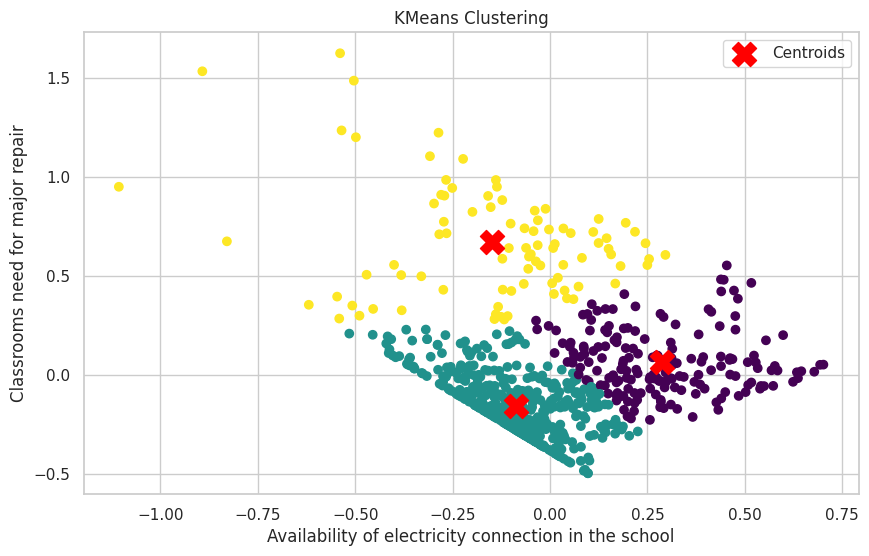

In [133]:
# mds_df['MDS1'], mds_df['MDS2']
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Standardize the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(mean_df)

# Choose two columns for the new dataset
selected_columns = ['MDS1', 'MDS2']

# Create a new dataset with only the selected columns
data = mds_df[selected_columns]

# Display the new dataset
# print(new_dataset.head())
# Choose two columns for KMeans clustering
feature1 = 'MDS1'
feature2 = 'MDS2'

# Concatenate selected features
features = pd.concat([data[feature1], data[feature2]], axis=1)

# Determine the number of clusters (you may need to choose this based on your data)
n_clusters = 3

# Fit KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features)

# Add cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(data[feature1], data[feature2], c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title(f'KMeans Clustering')
plt.xlabel('Availability of electricity connection in the school')
plt.ylabel('Classrooms need for major repair')
plt.legend()
plt.show()

In [163]:
mean_df

Building blocks in the school  \
District                                            
24 PARAGANAS NORTH                       1.238185   
24 PARAGANAS SOUTH                       1.596908   
ADILABAD                                 1.942797   
AGAR MALWA                               2.064415   
AGRA                                     1.496177   
...                                           ...   
YADGIR                                   2.384326   
YAMUNANAGAR                              1.302801   
YANAM                                    1.729730   
YAVATMAL                                 2.272358   
ZUNHEBOTO                                5.235714   

                    Classrooms used for instructional purposes  \
District                                                         
24 PARAGANAS NORTH                                    6.255063   
24 PARAGANAS SOUTH                                    6.719325   
ADILABAD                                              4.253531   
AGAR MALWA                                            4.565593   
AGRA                                                  6.356078   
...                                                        ...   
YADGIR                                                5.460188   
YAMUNANAGAR                                           7.913702   
YANAM                                                11.486486   
YAVATMAL                                              5.816057   
ZUNHEBOTO                                             7.721429   

                    Classrooms in good condition  \
District                                           
24 PARAGANAS NORTH                      4.810019   
24 PARAGANAS SOUTH                      4.832045   
ADILABAD                                3.617232   
AGAR MALWA                              4.074627   
AGRA                                    5.642775   
...                                          ...   
YADGIR                                  4.730408   
YAMUNANAGAR                             7.158970   
YANAM                                  11.486486   
YAVATMAL                                5.156843   
ZUNHEBOTO                               6.464286   

                    Classrooms need for minor repair  \
District                                               
24 PARAGANAS NORTH                          0.660951   
24 PARAGANAS SOUTH                          0.898243   
ADILABAD                                    0.399011   
AGAR MALWA                                  0.303221   
AGRA                                        0.452408   
...                                              ...   
YADGIR                                      0.241379   
YAMUNANAGAR                                 0.406510   
YANAM                                       0.000000   
YAVATMAL                                    0.381098   
ZUNHEBOTO                                   1.000000   

                    Classrooms need for major repair  \
District                                               
24 PARAGANAS NORTH                          0.802592   
24 PARAGANAS SOUTH                          0.989599   
ADILABAD                                    0.237288   
AGAR MALWA                                  0.187745   
AGRA                                        0.260894   
...                                              ...   
YADGIR                                      0.488401   
YAMUNANAGAR                                 0.348221   
YANAM                                       0.000000   
YAVATMAL                                    0.278117   
ZUNHEBOTO                                   0.257143   

                    Toilet seats available for boys  \
District                                              
24 PARAGANAS NORTH                         1.552120   
24 PARAGANAS SOUTH                         1.392410   
ADILABAD                                   1.581215   
AGAR MALWA                                 1.237235   
AGRA  

In [174]:
# Initialize the RobustScaler
scaler = StandardScaler()

# Normalize all values in the DataFrame using RobustScaler
df_normalized = pd.DataFrame(scaler.fit_transform(mean_df), columns=mean_df.columns)



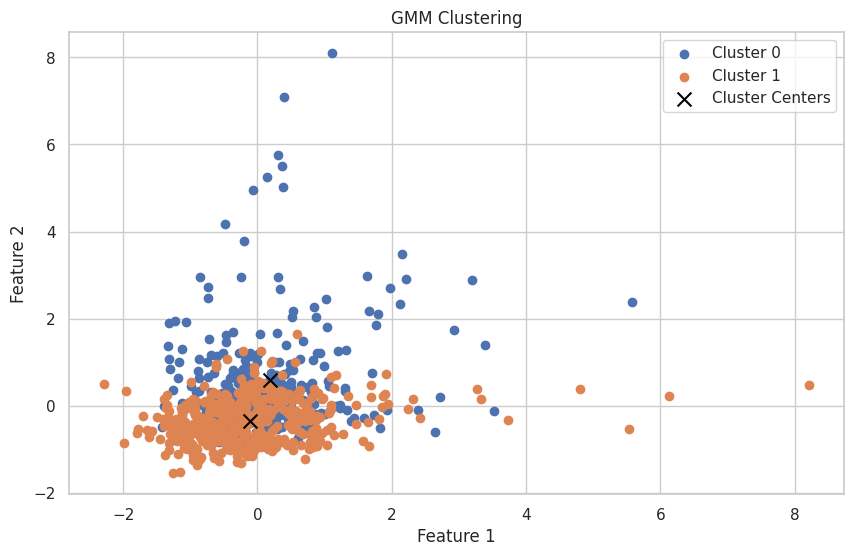

In [175]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your normalized pandas DataFrame
# If your data is not normalized, you can use StandardScaler to normalize it
# scaler = StandardScaler()
# normalized_data = scaler.fit_transform(df)

# Create and fit the GMM model
n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(normalized_data)

# Predict the cluster labels
cluster_labels = gmm.predict(normalized_data)

# Add the cluster labels to your DataFrame
df_normalized['Cluster'] = cluster_labels

# Scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(n_components):
    cluster_data = df_normalized[df_normalized['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

# Plot cluster centers
cluster_centers = gmm.means_[:, :2]  # Assuming the first two columns are used for plotting
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Cluster Centers')

plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
# #checking the values in the computers column
# df['Computers'].value_counts()

In [134]:
columns_to_binary = ['Toilet seats available for boys', 'Toilet seats available for girls',
                    'Students for whom furniture is available', 'Computers']

# Convert columns to binary (1 for presence, 0 for absence)
df[columns_to_binary] = df[columns_to_binary].apply(lambda x: (x > 0).astype(int))
df


State         District  Building blocks in the school  \
0           MAHARASHTRA  MUMBAI SUBURBAN                              1   
1           MAHARASHTRA  MUMBAI SUBURBAN                              1   
2           MAHARASHTRA  MUMBAI SUBURBAN                              1   
3           MAHARASHTRA  MUMBAI SUBURBAN                              1   
4           MAHARASHTRA  MUMBAI SUBURBAN                              1   
...                 ...              ...                            ...   
1550994  MADHYA PRADESH       CHHATARPUR                              1   
1550996         TRIPURA    North Tripura                              3   
1550997   UTTAR PRADESH        BARABANKI                              5   
1550998          PUNJAB          PATIALA                              1   
1550999       KARNATAKA   UTTARA KANNADA                              1   

         Classrooms used for instructional purposes  \
0                                                 6   
1                                                 6   
2                                                12   
3                                                 8   
4                                                 6   
...                                             ...   
1550994                                           3   
1550996                                           5   
1550997                                           5   
1550998                                           3   
1550999                                           2   

         Classrooms in good condition  Classrooms need for minor repair  \
0                                   6                                 0   
1                                   6                                 0   
2                                  10                                 2   
3                                   8                                 0   
4                                   6                                 0   
...                               ...                               ...   
1550994                             3                                 0   
1550996                             3                                 1   
1550997                             5                                 0   
1550998                             3                                 0   
1550999                             2                                 0   

         Classrooms need for major repair  Toilet seats available for boys  \
0                                       0                                1   
1                                       0                                1   
2                                       0                                1   
3                                       0                                1   
4                                       0                                1   
...                                   ...                              ...   
1550994                                 0                                1   
1550996                                 1                                1   
1550997                                 0                                1   
1550998                                 0                                1   
1550999                                 0                                1   

         Toilet seats available for girls  \
0                                       1   
1                                       1   
2                                       1   
3                                       1   
4                                       1   
...                                   ...   
1550994                                 1   
1550996                                 0   
1550997                                 1   
1550998                                 1   
1550999                                 1   

         Availability of hand washing facility with soap near toilets or urin

In [135]:

# Define the facilities you want to analyze
facilities = ['Computers', 'electricity', 'Drinking_water', 'boys_toilet', 'female_toilet','handwashing_facility','furniture']

# Define the corresponding column names in the dataset
column_mapping = {
    'Computers': 'Computers',
    'electricity': 'Availability of electricity connection in the school',
    'Drinking_water': 'Availability of drinking water in the school premises',
    'boys_toilet': 'Toilet seats available for boys',
    'female_toilet': 'Toilet seats available for girls',
    'handwashing_facility':'Availability of hand washing facility with soap near toilets or urinals block',
    'furniture':'Students for whom furniture is available'
}

# Initialize a dictionary to store the results
results = {'State': []}
for facility in facilities:
    results[facility] = []

# Group the data by state
grouped_by_state = df.groupby('State')

# Calculate percentages for each facility in each state
for state, data in grouped_by_state:
    results['State'].append(state)
    total_schools = len(data)

    for facility, column_name in column_mapping.items():
        facility_count = data[column_name].sum()  # Sum of binary values (1 represents presence)
        percentage = (facility_count / total_schools) * 100
        results[facility].append(percentage)

# Create a DataFrame from the results dictionary
percentage_df = pd.DataFrame(results)

# Display the resulting DataFrame
percentage_df

State  Computers  electricity  \
0                    ANDAMAN AND NICOBAR ISLANDS  49.636804    92.493947   
1                                 ANDHRA PRADESH  21.844101    94.721769   
2                              ARUNACHAL PRADESH   9.073198    42.026162   
3                                          ASSAM  10.494774    30.976384   
4                                          BIHAR   5.876346    78.708316   
5                                     CHANDIGARH  98.253275   100.000000   
6                                   CHHATTISGARH  92.629516    86.503301   
7                                          DELHI  89.426618   100.000000   
8                                            GOA  45.289367    99.932705   
9                                        GUJARAT  59.742758    99.923047   
10                                       HARYANA  42.117687    98.905532   
11                              HIMACHAL PRADESH  29.264771    96.351622   
12                             JAMMU AND KASHMIR  19.786287    66.685663   
13                                     JHARKHAND  53.446775    76.522994   
14                                     KARNATAKA  85.006137    88.813737   
15                                        KERALA  82.657158    99.005214   
16                                        LADAKH  25.242718    41.941748   
17                                   LAKSHADWEEP  91.111111   100.000000   
18                                MADHYA PRADESH   3.524860    56.361311   
19                                   MAHARASHTRA  64.181341    93.994400   
20                                       MANIPUR  24.817195    51.828052   
21                                     MEGHALAYA  10.271799    19.308775   
22                                       MIZORAM  43.599258    76.623377   
23                                      NAGALAND  34.102755    64.594192   
24                                        ODISHA   9.837932    38.497028   
25                                    PUDUCHERRY  76.184032   100.000000   
26                                        PUNJAB  46.509760    99.954604   
27                                     RAJASTHAN  38.699581    72.227540   
28                                        SIKKIM  54.432348    98.755832   
29                                    TAMIL NADU  47.460779   100.000000   
30                                     TELANGANA  28.301236    93.178348   
31  THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU  72.633745   100.000000   
32                                       TRIPURA  10.207010    34.740726   
33                                 UTTAR PRADESH  10.268258    69.612611   
34                                   UTTARAKHAND  29.782329    85.379261   
35                                   WEST BENGAL   9.501690    91.160562   

    Drinking_water  boys_toilet  female_toilet  handwashing_facility  \
0        99.757869    98.547215      99.273608             95.399516   
1        89.341141    88.517167      96.395315             60.564462   
2        62.176454    70.080712      70.164208             24.130253   
3        88.992644    73.327139      75.123500             62.398761   
4        99.574507    96.896736      97.698932             51.278182   
5       100.000000    98.689956      99.563319            100.000000   
6        99.199026    96.438424      97.170906             73.891288   
7       100.000000    87.269858      83.131685             99.158338   
8       100.000000    99.192463      99.259758             99.865410   
9        99.987175    96.535297      97.383609             78.158266   
10       99.738186    92.870939      95.622130             90.875145   
11       99.933363    96.962461      97.678809             90.581964   
12       96.634016    86.934996      88.309884             80.174533   
13       96.853243    96.269238      97.748717             53.075760   
14       98.805810    91.686698      94.975196             57.680407   
15       99.574519    97.153473      98.825433             84.239228   
16    

In [ ]:
percentage_df.head()

In [ ]:
percentage_df.describe()

In [136]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = scaler.fit(percentage_df.drop('State',axis=1))
percentage_df[['Computers',	'electricity',	'Drinking_water',	'boys_toilet',	'female_toilet',	'handwashing_facility'	,'furniture']] = model.transform(percentage_df.drop('State',axis=1))

[18.182577753659206, 10.52937912267697, 6.800918867311623, 5.5026987192071966, 4.801786841491583, 4.04853285600107, 3.486542183035383, 3.035620942387899, 2.6923122691140446]


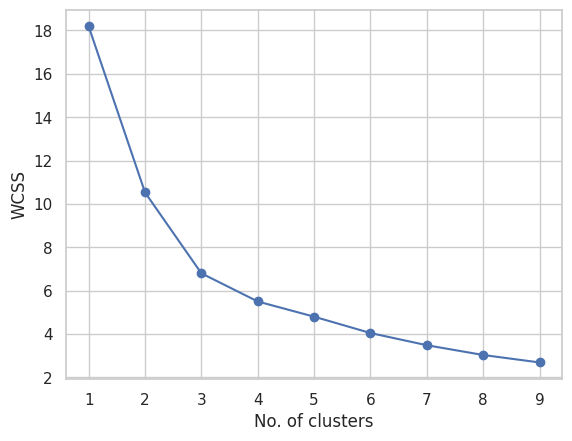

In [137]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,10):
  kmeans=KMeans(i,random_state=31)
  kmeans.fit(percentage_df.drop('State',axis=1))
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,'-o')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
print(wcss)

plt.savefig('Elbow.png')

In [138]:
from sklearn.cluster import KMeans
kmeans=KMeans(3,random_state=3)
kmeans.fit(percentage_df.drop('State',axis=1))
kmeans.labels_
percentage_df['Cluster']=kmeans.labels_
percentage_df.head()


State  Computers  electricity  Drinking_water  \
0  ANDAMAN AND NICOBAR ISLANDS   0.486780     0.906978        0.996123   
1               ANDHRA PRADESH   0.193387     0.934587        0.829326   
2            ARUNACHAL PRADESH   0.058571     0.281535        0.394355   
3                        ASSAM   0.073578     0.144596        0.823746   
4                        BIHAR   0.024823     0.736134        0.993187   

   boys_toilet  female_toilet  handwashing_facility  furniture  Cluster  
0     0.977835       0.977423              0.946887   0.979324        0  
1     0.633299       0.887964              0.544714   0.268791        2  
2     0.000000       0.072685              0.124078   0.822347        1  
3     0.111516       0.226823              0.565891   0.792205        1  
4     0.921141       0.928481              0.437503   0.576940        2

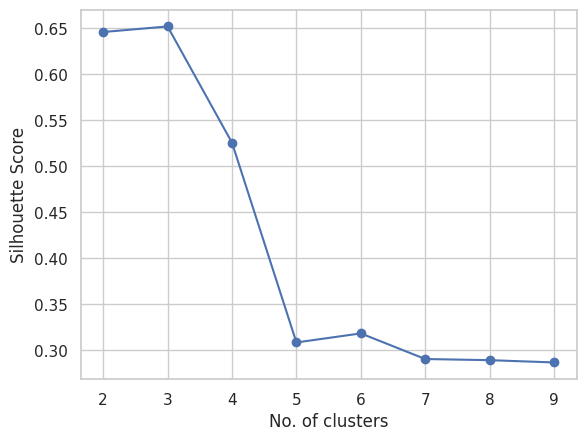

<Figure size 640x480 with 0 Axes>

In [139]:
from sklearn.metrics import silhouette_score
silhouette_scores=[]
for i in range(2,10):
  kmeans=KMeans(i,random_state=31)
  kmeans.fit(percentage_df.drop('State',axis=1))
  silhouette_scores.append(silhouette_score(percentage_df.drop('State',axis=1),kmeans.labels_))
plt.plot(range(2,10),silhouette_scores,'-o')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Score')
plt.show()
plt.savefig('Silhoutte_score.png')

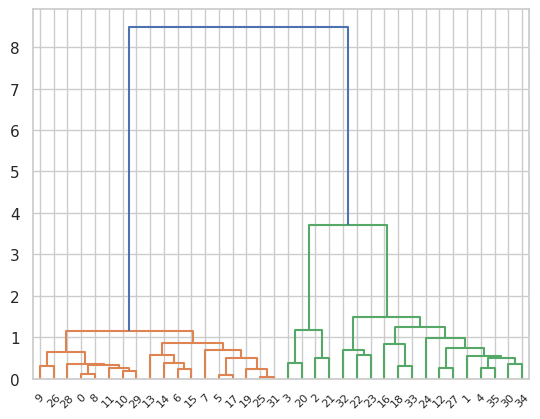

In [140]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(percentage_df.drop('State',axis=1), method='ward'))
plt.savefig('Dendogram.png')

In [141]:

df1=pd.melt(frame=percentage_df.drop('State',axis=1),id_vars='Cluster',var_name='parameters',value_name='values')
df1.head()

Cluster parameters    values
0        0  Computers  0.486780
1        2  Computers  0.193387
2        1  Computers  0.058571
3        1  Computers  0.073578
4        2  Computers  0.024823

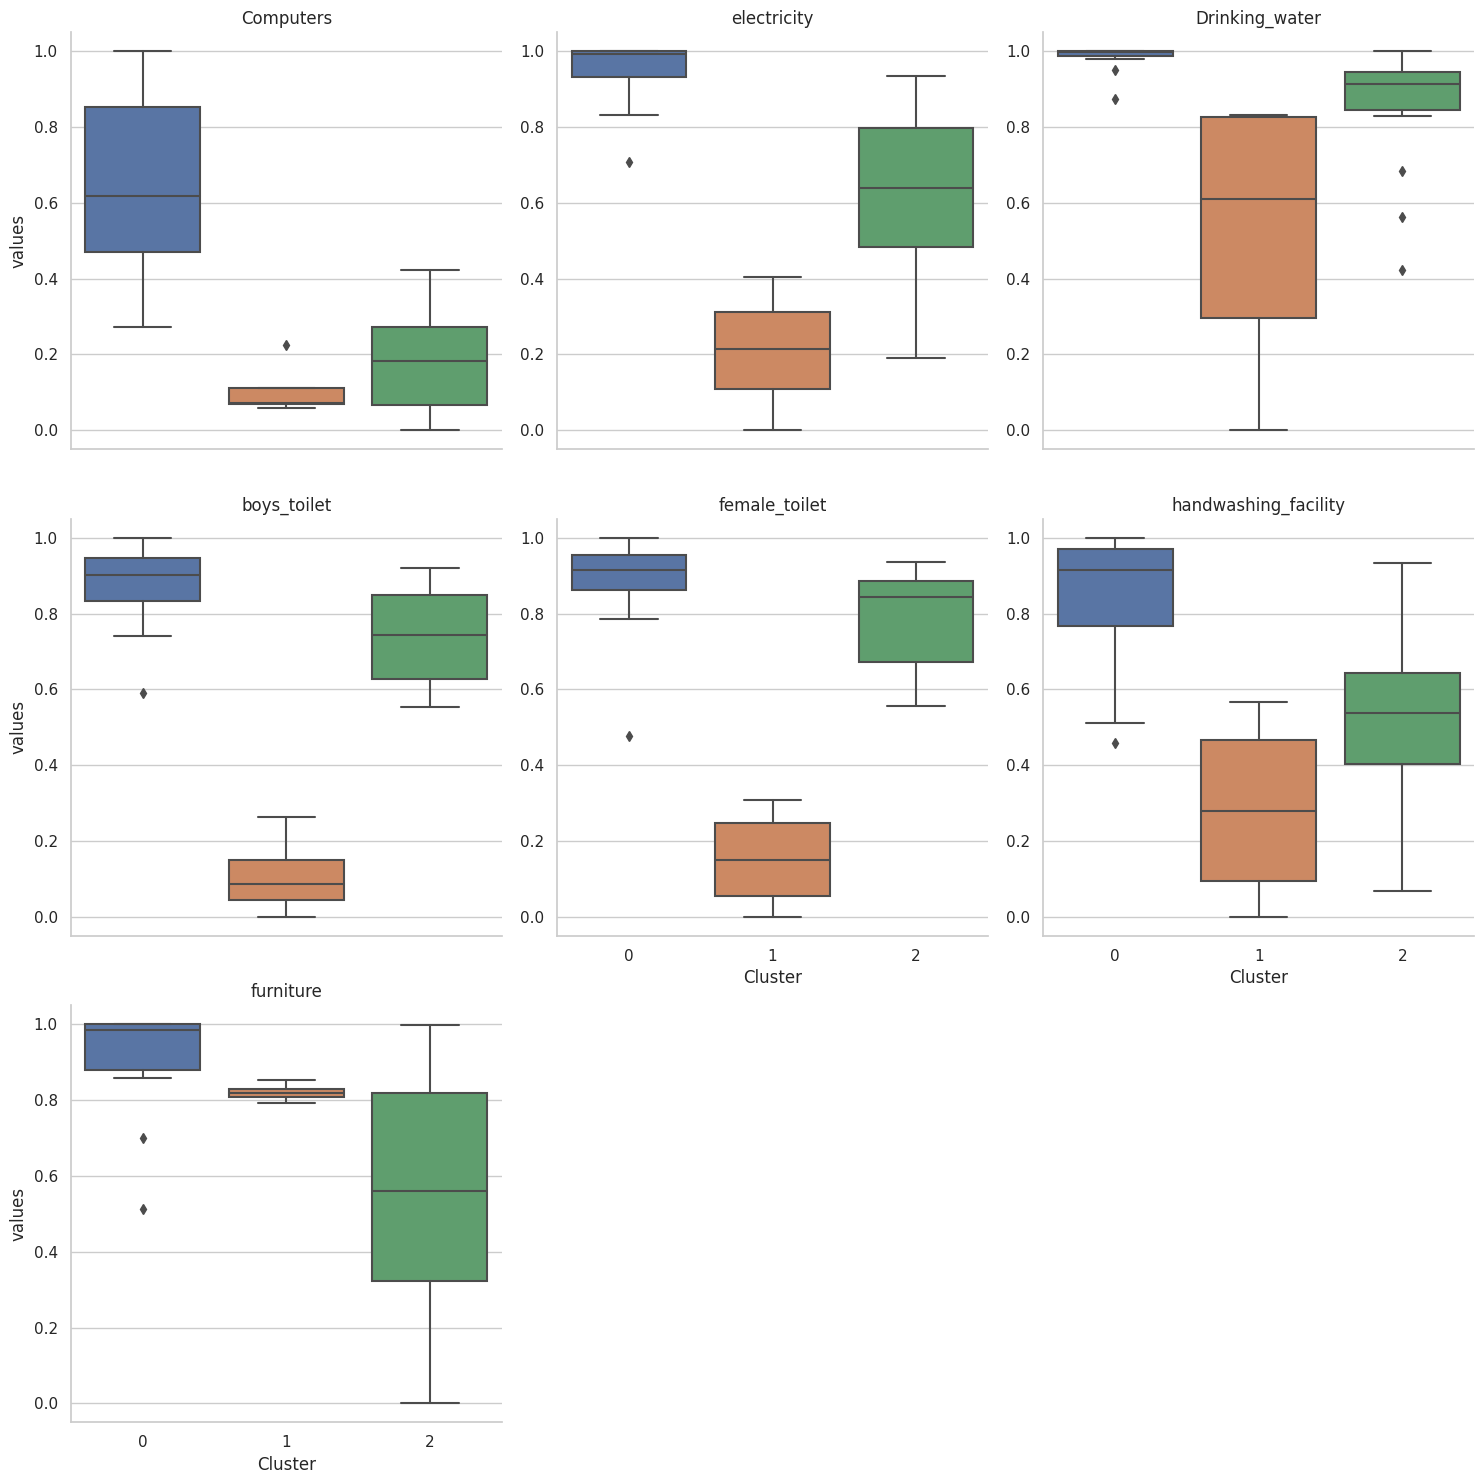

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a 3x3 grid of box plots
g = sns.catplot(
    data=df1,
    y='values',
    x='Cluster',
    col='parameters',
    kind='box',
    sharey=False,
    col_wrap=3  # Set col_wrap to the number of columns you want (3 in this case)
)

# Set the title for each subplot
g.set_titles(col_template="{col_name}")

# Adjust the layout
plt.tight_layout()

# Save the plot
plt.savefig('Box plot for each cluster.png')
plt.show()


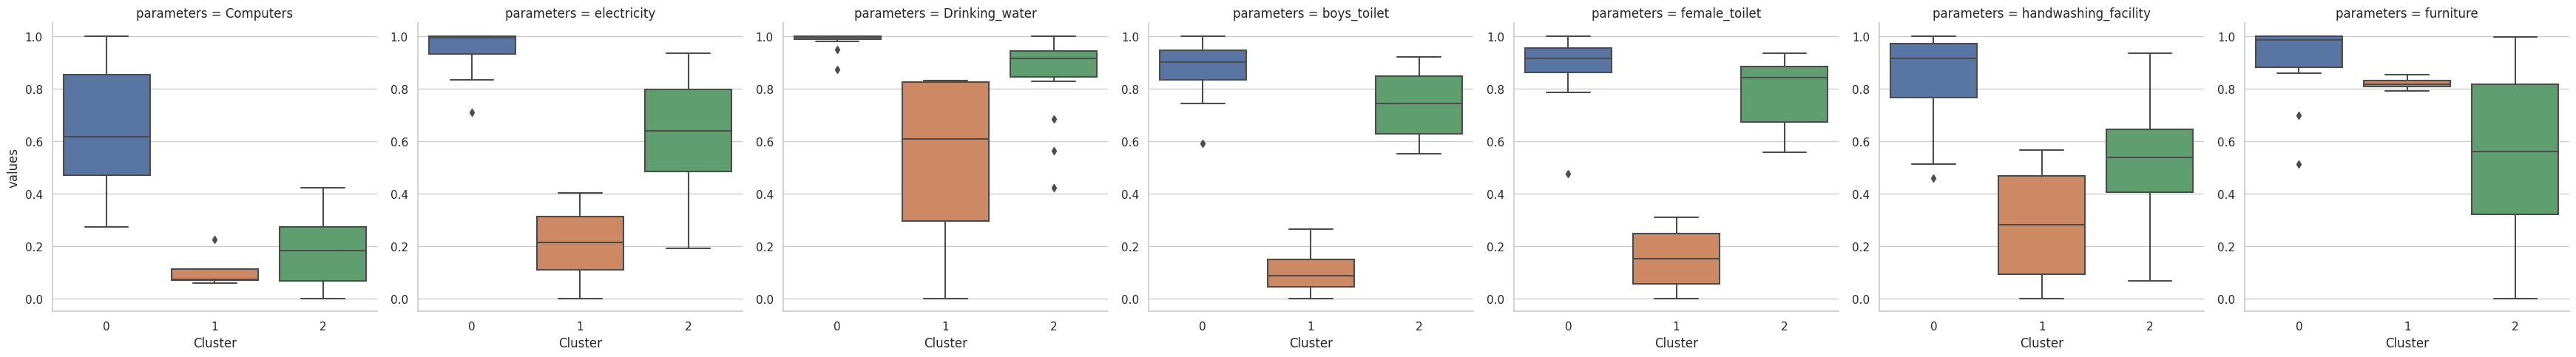

In [143]:
import seaborn as sns
sns.catplot(data=df1, y='values', x='Cluster',col = 'parameters', kind='box', sharey=False)
plt.savefig('Box plot for each cluster.png')

In [146]:
#agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
agglo=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agglo.fit(percentage_df.drop('State',axis=1))
percentage_df['agg_cluster']=agglo.labels_



In [147]:
df2=pd.melt(frame=percentage_df.drop(['State','Cluster'],axis=1),id_vars='agg_cluster',var_name='parameters',value_name='values')
df2.head()

agg_cluster parameters    values
0            2  Computers  0.486780
1            0  Computers  0.193387
2            1  Computers  0.058571
3            1  Computers  0.073578
4            0  Computers  0.024823

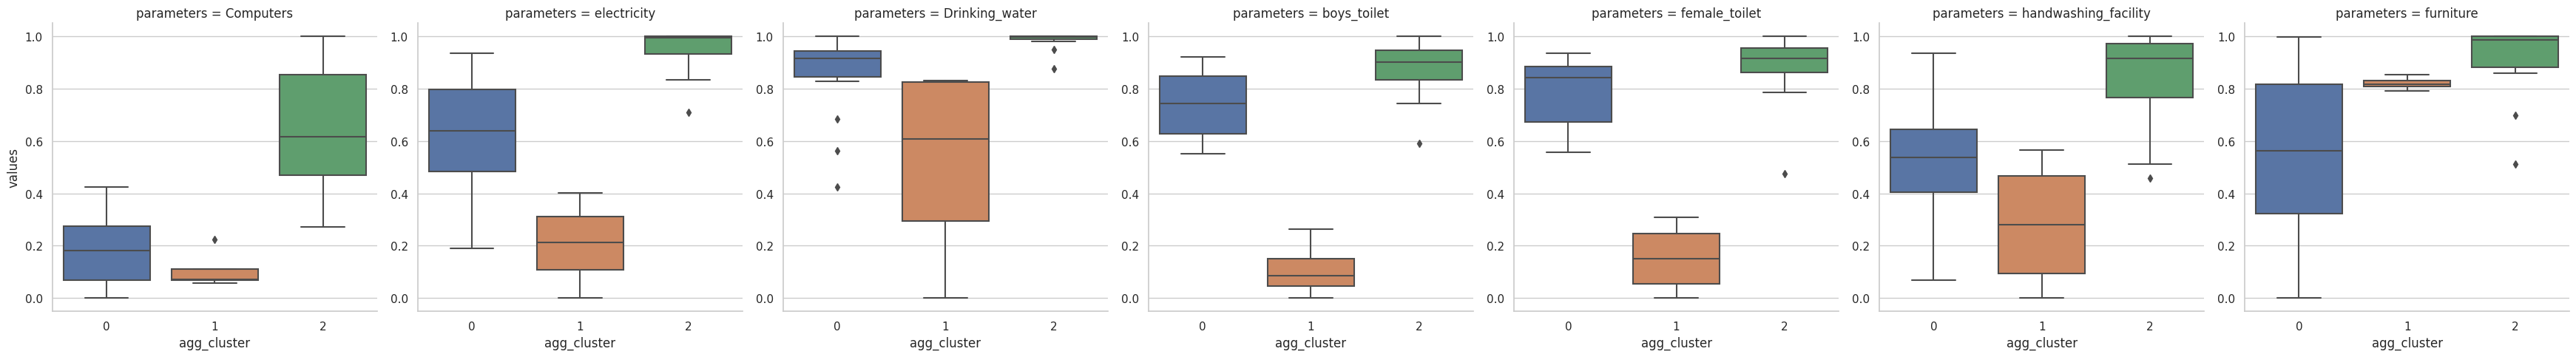

In [148]:
sns.catplot(data=df2,y='values',x='agg_cluster',col='parameters',kind='box',sharey=False)

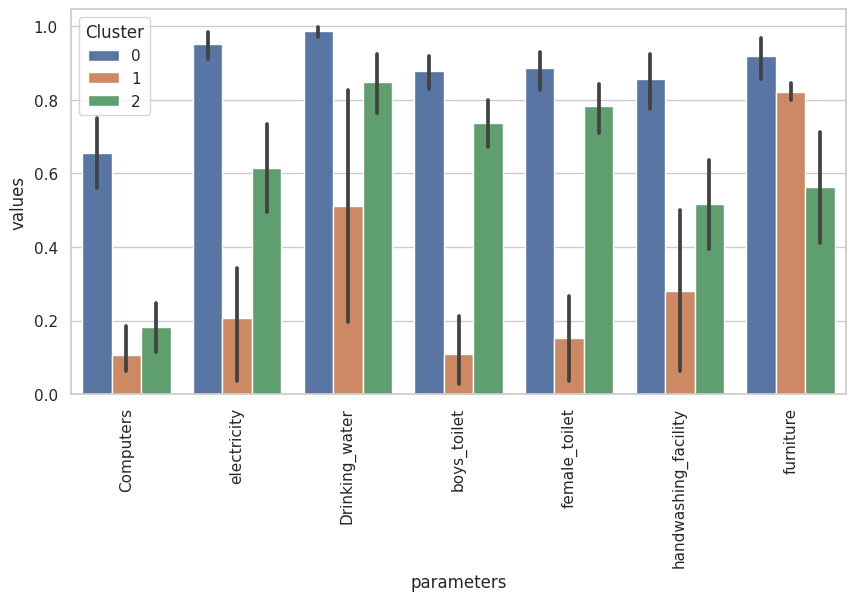

In [149]:
#plotting the clusters
plt.figure(figsize=(10,5))
sns.barplot(x='parameters',y='values',hue='Cluster',data=df1)
plt.xticks(rotation=90)
plt.show()



In [ ]:
percentage_df.head()

In [21]:
# #corr matrix
# corr = df.corr()
# plt.figure(figsize=(15, 8))
# sns.heatmap(corr, annot=True, cmap='Blues')
# plt.show()


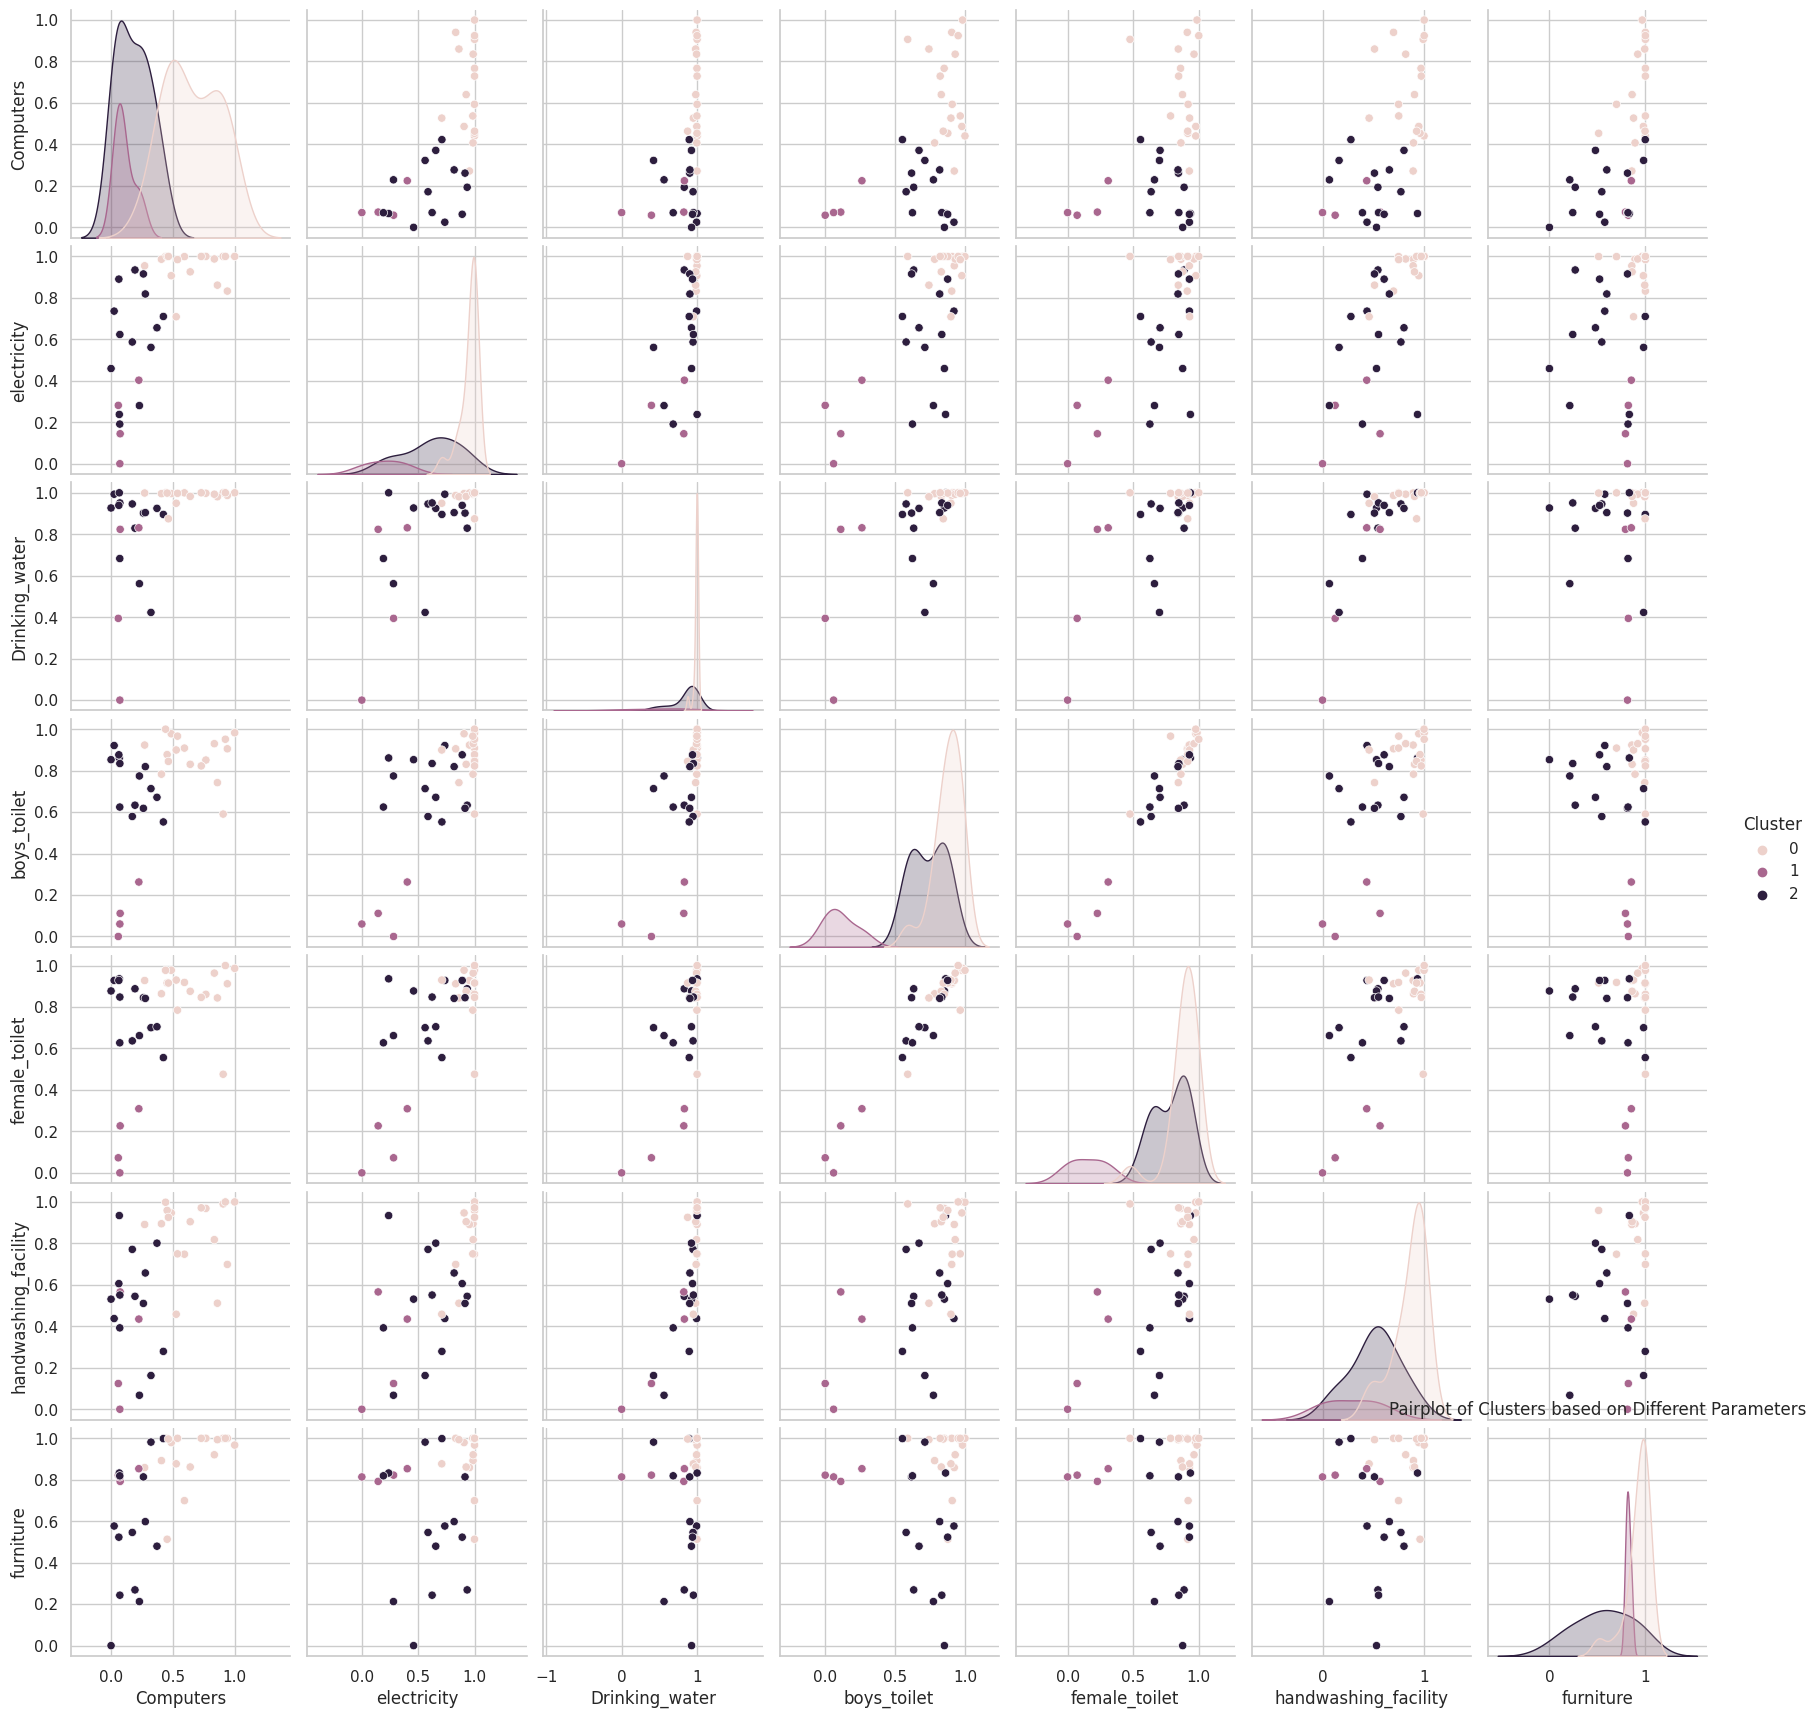

<Figure size 640x480 with 0 Axes>

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the mentioned columns
selected_columns = ['Computers', 'electricity', 'Drinking_water', 'boys_toilet', 
                    'female_toilet', 'handwashing_facility', 'furniture', 'Cluster']

# Select the relevant columns
cluster_data = percentage_df[selected_columns]

# Plotting the clusters
sns.pairplot(cluster_data, hue='Cluster',markers ='o')
plt.title('Pairplot of Clusters based on Different Parameters', y=1.02)
plt.show()
plt.savefig('pair plot.png')

In [ ]:
percentage_df[percentage_df['agg_cluster']==0]

In [ ]:
percentage_df[percentage_df['agg_cluster']==1]

In [ ]:
percentage_df[percentage_df['agg_cluster']==2]

In [187]:
# Renaming the clusters as discussed before
percentage_df['k_label']=percentage_df.Cluster.map({0: 'Best infrastructure, Advanced Facilities, Adequate Resources',
1: 'Inadequate Infrastructure, Intermediate Facilities, Abundant Resources',
2: 'Good Infrastucture, Basic Facilities, Limited Resources'})

In [188]:
# Importing the shape file for Indian states. It is a vector map representation where places are represented as collection of discrete objects using points, lines & polygons.
# Geopandas is similar to Pandas but contains geographical locations
import geopandas
map=geopandas.read_file('/kaggle/input/geopandas/Indian_States.shp')
map.head()

st_nm                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...

In [189]:
states=map['st_nm'].unique()
states

array(['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli',
       'Daman & Diu', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'NCT of Delhi', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Odisha',
       'Andhra Pradesh'], dtype=object)

In [190]:
replace={'ANDAMAN AND NICOBAR ISLANDS': 'Andaman & Nicobar Island',
    'ANDHRA PRADESH': 'Andhra Pradesh',
    'ARUNACHAL PRADESH': 'Arunanchal Pradesh',
    'ASSAM': 'Assam',
    'BIHAR': 'Bihar',
    'CHANDIGARH': 'Chandigarh',
    'CHHATTISGARH': 'Chhattisgarh',
    'DELHI': 'NCT of Delhi',
    'GOA': 'Goa',
    'GUJARAT': 'Gujarat',
    'HARYANA': 'Haryana',
    'HIMACHAL PRADESH': 'Himachal Pradesh',
    'JAMMU AND KASHMIR': 'Jammu & Kashmir',
    'JHARKHAND': 'Jharkhand',
    'KARNATAKA': 'Karnataka',
    'KERALA': 'Kerala',
    'LAKSHADWEEP': 'Lakshadweep',
    'MADHYA PRADESH': 'Madhya Pradesh',
    'MAHARASHTRA': 'Maharashtra',
    'MANIPUR': 'Manipur',
    'MEGHALAYA': 'Meghalaya',
    'MIZORAM': 'Mizoram',
    'NAGALAND': 'Nagaland',
    'ODISHA': 'Odisha',
    'PUDUCHERRY': 'Puducherry',
    'PUNJAB': 'Punjab',
    'RAJASTHAN': 'Rajasthan',
    'SIKKIM': 'Sikkim',
    'TAMIL NADU': 'Tamil Nadu',
    'TELANGANA': 'Telangana',
    'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU': 'Dadara & Nagar Havelli',
    'TRIPURA': 'Tripura',
    'UTTAR PRADESH': 'Uttar Pradesh',
    'UTTARAKHAND': 'Uttarakhand',
    'WEST BENGAL': 'West Bengal'}
percentage_df = percentage_df.replace({"State": replace})  

In [191]:
percentage_df.State.values

array(['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunanchal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'NCT of Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'LADAKH', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Dadara & Nagar Havelli',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [192]:
map.st_nm.values

array(['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli',
       'Daman & Diu', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'NCT of Delhi', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Odisha',
       'Andhra Pradesh'], dtype=object)

In [193]:
mer_g=pd.merge(percentage_df,map,left_on='State',right_on='st_nm',how='inner')
mer_g.head()

State  Computers  electricity  Drinking_water  \
0  Andaman & Nicobar Island   0.486780     0.906978        0.996123   
1            Andhra Pradesh   0.193387     0.934587        0.829326   
2        Arunanchal Pradesh   0.058571     0.281535        0.394355   
3                     Assam   0.073578     0.144596        0.823746   
4                     Bihar   0.024823     0.736134        0.993187   

   boys_toilet  female_toilet  handwashing_facility  furniture  Cluster  \
0     0.977835       0.977423              0.946887   0.979324        0   
1     0.633299       0.887964              0.544714   0.268791        2   
2     0.000000       0.072685              0.124078   0.822347        1   
3     0.111516       0.226823              0.565891   0.792205        1   
4     0.921141       0.928481              0.437503   0.576940        2   

   agg_cluster                                            k_label  \
0            2  Best infrastructure, Advanced Facilities, Adeq...   
1            0  Good Infrastucture, Basic Facilities, Limited ...   
2            1  Inadequate Infrastructure, Intermediate Facili...   
3            1  Inadequate Infrastructure, Intermediate Facili...   
4            0  Good Infrastucture, Basic Facilities, Limited ...   

                      st_nm                                           geometry  
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...  
1            Andhra Pradesh  MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...  
2        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...  
3                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...  
4                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...

In [194]:
# converting the coordinate reference system to epsg 4326. It containes the geometry of states in terms of their latitude
# and longitude
from geopandas import GeoDataFrame
merg= GeoDataFrame(mer_g,crs={'init': 'epsg:4326'})

In [195]:
# !pip install --upgrade bokeh pandas_bokeh
# 

In [196]:
merg.head()

State  Computers  electricity  Drinking_water  \
0  Andaman & Nicobar Island   0.486780     0.906978        0.996123   
1            Andhra Pradesh   0.193387     0.934587        0.829326   
2        Arunanchal Pradesh   0.058571     0.281535        0.394355   
3                     Assam   0.073578     0.144596        0.823746   
4                     Bihar   0.024823     0.736134        0.993187   

   boys_toilet  female_toilet  handwashing_facility  furniture  Cluster  \
0     0.977835       0.977423              0.946887   0.979324        0   
1     0.633299       0.887964              0.544714   0.268791        2   
2     0.000000       0.072685              0.124078   0.822347        1   
3     0.111516       0.226823              0.565891   0.792205        1   
4     0.921141       0.928481              0.437503   0.576940        2   

   agg_cluster                                            k_label  \
0            2  Best infrastructure, Advanced Facilities, Adeq...   
1            0  Good Infrastucture, Basic Facilities, Limited ...   
2            1  Inadequate Infrastructure, Intermediate Facili...   
3            1  Inadequate Infrastructure, Intermediate Facili...   
4            0  Good Infrastucture, Basic Facilities, Limited ...   

                      st_nm                                           geometry  
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...  
1            Andhra Pradesh  MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...  
2        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...  
3                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...  
4                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...

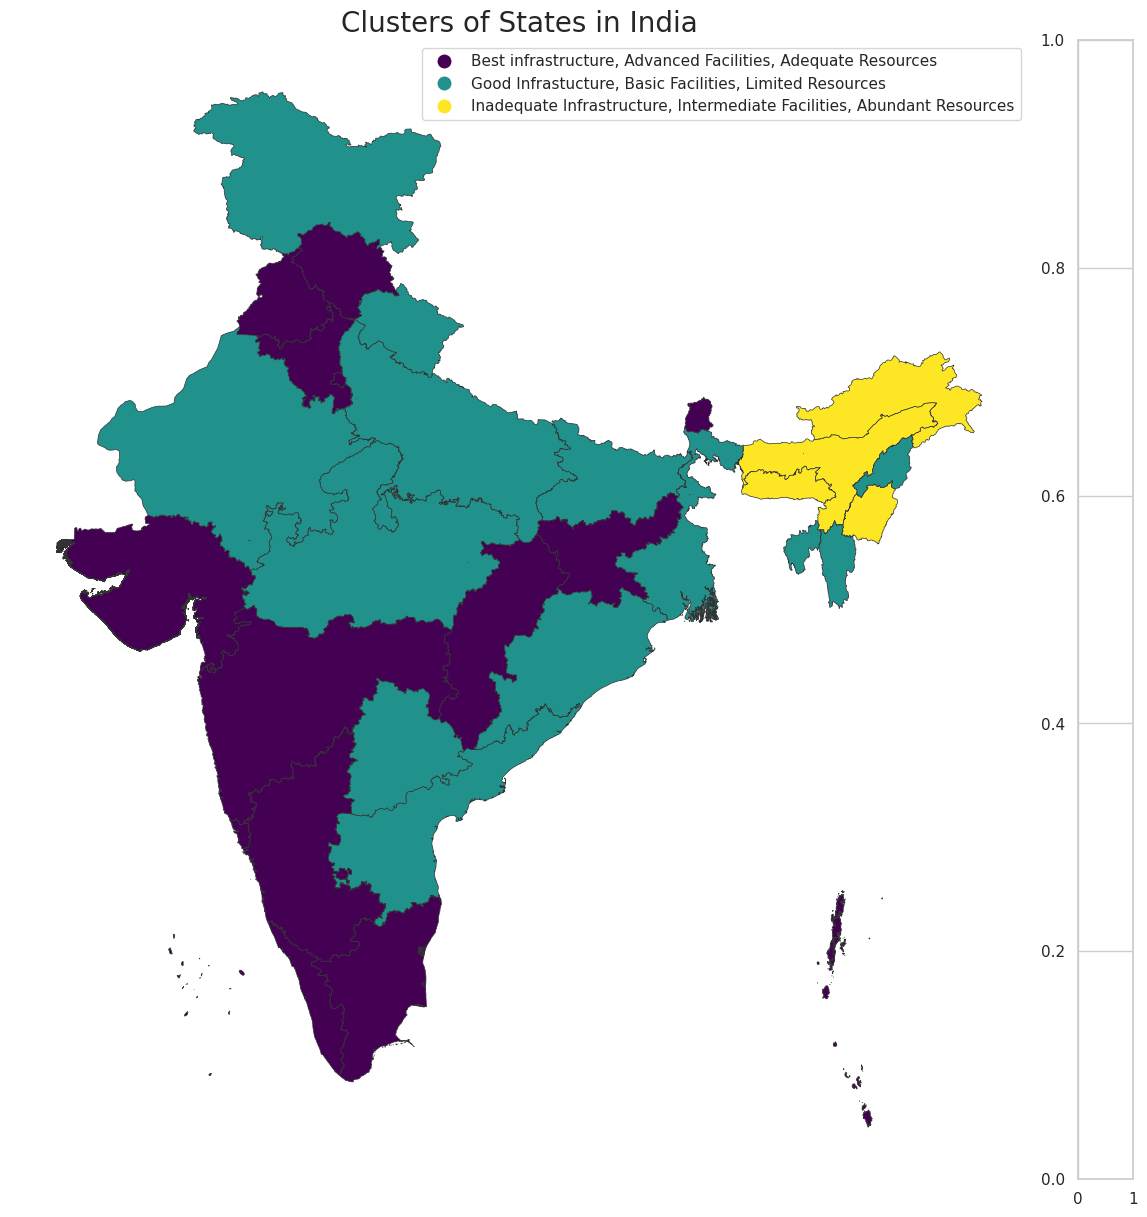

<Figure size 640x480 with 0 Axes>

In [197]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming you have a GeoDataFrame merg with the 'agg_label' column representing the clusters

# Plotting map of India
fig, ax = plt.subplots(1, figsize=(15, 15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax.axis('off')
ax.set_title('Clusters of States in India', fontdict={'fontsize': '20', 'fontweight': '3'})
merg.plot(column='k_label', cmap='viridis', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True, cax=cax)

plt.show()
plt.savefig('State cluster on Indian Map.png')

In [198]:
# Assuming your DataFrame is named df
df.to_csv('District.csv', index=False)

In [199]:
# Assuming your DataFrame is named df
df.to_csv('percentage_df.csv', index=False)